In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.simplefilter(action='ignore')
pd.set_option('display.max_columns', None)

In [ ]:

properties_2016 = pd.read_csv('properties_2016.csv')
train_2016 = pd.read_csv('train_2016_v2.csv')

In [ ]:
# Shape of the datasets
print('Shape of properties_2016: ', properties_2016.shape)
print('Shape of train_2016: ', train_2016.shape)

Shape of properties_2016:  (91441, 58)
Shape of train_2016:  (90275, 3)


In [ ]:
properties_2016.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [ ]:
train_2016.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [ ]:
# Reforming Dataset

final_df = properties_2016.copy()
final_df = final_df.merge(train_2016,on = 'parcelid',how = 'inner')
final_df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,17073783,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,548.0,1264.0,1264.0,NaN,NaN,548.0,NaN,6111.0,NaN,2.0,2.0,0.0,NaN,NaN,34303597.0,-119287236.0,1735.0,NaN,NaN,NaN,NaN,NaN,1128,265.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97081.0,5.0,NaN,1.0,NaN,NaN,128.0,NaN,1986.0,2.0,NaN,115087.0,191811.0,2015.0,76724.0,2015.06,NaN,NaN,6.111002e+13,0.0953,2016-01-27
1,17088994,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,777.0,777.0,777.0,NaN,NaN,777.0,NaN,6111.0,NaN,1.0,1.0,0.0,NaN,NaN,34272866.0,-119198911.0,NaN,NaN,NaN,NaN,NaN,NaN,1129,266.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97083.0,4.0,NaN,NaN,NaN,NaN,198.0,NaN,1990.0,1.0,NaN,143809.0,239679.0,2015.0,95870.0,2581.30,NaN,NaN,6.111002e+13,0.0198,2016-03-30
2,17100444,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,1101.0,1101.0,1101.0,NaN,NaN,1101.0,NaN,6111.0,NaN,2.0,2.0,441.0,NaN,NaN,34340801.0,-119079610.0,6569.0,NaN,NaN,NaN,NaN,NaN,1111,261.0,NaN,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1956.0,1.0,NaN,33619.0,47853.0,2015.0,14234.0,591.64,NaN,NaN,6.111001e+13,0.0060,2016-05-27
3,17102429,NaN,NaN,NaN,1.5,2.0,NaN,NaN,1.5,NaN,1554.0,1554.0,1554.0,NaN,NaN,1554.0,NaN,6111.0,1.0,1.0,2.0,460.0,NaN,NaN,34354313.0,-119076405.0,7400.0,NaN,NaN,NaN,NaN,NaN,1110,261.0,NaN,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN,1965.0,1.0,NaN,45609.0,62914.0,2015.0,17305.0,682.78,NaN,NaN,6.111001e+13,-0.0566,2016-06-07
4,17109604,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,1305.0,2415.0,2415.0,NaN,NaN,1305.0,NaN,6111.0,1.0,2.0,2.0,665.0,NaN,NaN,34266578.0,-119165392.0,6326.0,NaN,NaN,NaN,NaN,NaN,1111,261.0,NaN,6.111001e+07,34543.0,2061.0,NaN,97084.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1984.0,2.0,NaN,277000.0,554000.0,2015.0,277000.0,5886.92,NaN,NaN,6.111001e+13,0.0573,2016-08-08


In [ ]:
final_df.shape

(2750, 60)

In [ ]:
# Creating a copy of the dataset
zillow_df = final_df.copy()

In [ ]:
zillow_df.columns

Index(['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildin

In [ ]:
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2750 entries, 0 to 2749
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      2750 non-null   int64  
 1   airconditioningtypeid         874 non-null    float64
 2   architecturalstyletypeid      2 non-null      float64
 3   basementsqft                  1 non-null      float64
 4   bathroomcnt                   2750 non-null   float64
 5   bedroomcnt                    2750 non-null   float64
 6   buildingclasstypeid           0 non-null      float64
 7   buildingqualitytypeid         1762 non-null   float64
 8   calculatedbathnbr             2710 non-null   float64
 9   decktypeid                    24 non-null     float64
 10  finishedfloor1squarefeet      226 non-null    float64
 11  calculatedfinishedsquarefeet  2731 non-null   float64
 12  finishedsquarefeet12          2623 non-null   float64
 13  fin

In [ ]:
zillow_df.describe()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
count,2.750000e+03,874.000000,2.0,1.0,2750.000000,2750.000000,0.0,1762.000000,2710.000000,24.0,226.000000,2731.000000,2623.000000,1.0,96.000000,226.000000,11.000000,2750.000000,299.000000,2710.000000,899.000000,899.000000,1721.000000,2.750000e+03,2.750000e+03,2.430000e+03,568.0,35.000000,34.0,28.0,540.0,2750.000000,2.750000e+03,2692.000000,2750.000000,1132.000000,2749.000000,2750.000000,1.0,371.000000,2.0,1790.000000,91.000000,2.000000,2727.000000,590.000000,2.739000e+03,2.750000e+03,2750.0,2.750000e+03,2749.000000,40.000000,2.731000e+03,2750.000000
mean,1.298085e+07,1.700229,7.0,616.0,2.280727,3.036000,NaN,5.575482,2.314391,66.0,1368.898230,1782.385573,1757.314907,1440.0,2454.541667,1368.898230,1925.636364,6049.192000,1.210702,2.245387,1.797553,342.410456,3.924463,3.400969e+07,-1.182130e+08,3.177526e+04,1.0,517.828571,1.0,1.0,1.0,261.944364,6.049497e+07,31560.885958,2540.880000,192753.145760,96532.298654,1.412000,7.0,1.008086,6.0,1.087709,314.285714,261.500000,1968.741474,1.449153,1.803361e+05,4.528576e+05,2015.0,2.732429e+05,5887.615951,12.900000,6.049492e+13,0.015796
std,1.783980e+06,2.755284,0.0,NaN,1.009103,1.153456,NaN,1.964544,0.977438,0.0,598.835791,920.981884,908.317402,NaN,982.246040,598.835791,1238.148640,21.409573,0.510710,0.967508,0.553542,253.834569,3.457565,2.582954e+05,3.636151e+05,1.027593e+05,0.0,129.902562,0.0,0.0,0.0,3.984350,2.125407e+05,38274.188395,795.100793,168008.909975,411.089093,2.791545,NaN,0.089680,0.0,0.425060,222.951180,37.476659,24.125731,0.543482,2.025412e+05,5.243776e+05,0.0,3.684059e+05,6594.163131,1.891953,2.127608e+11,0.161049
min,1.071497e+07,1.000000,7.0,616.0,0.000000,0.000000,NaN,1.000000,1.000000,66.0,49.000000,358.000000,358.000000,1440.0,646.000000,49.000000,800.000000,6037.000000,1.000000,1.000000,0.000000,0.000000,2.000000,3.334135e+07,-1.193049e+08,8.710000e+02,1.0,325.000000,1.0,1.0,1.0,246.000000,6.037101e+07,3491.000000,1286.000000,6952.000000,95982.000000,0.000000,7.0,1.000000,6.0,1.000000,49.000000,235.000000,1890.000000,1.000000,1.044000e+03,1.112200e+04,2015.0,3.134000e+03,422.500000,8.000000,6.037101e+13,-1.537000
25%,1.158204e+07,1.000000,7.0,616.0,2.000000,2.000000,NaN,4.000000,2.000000,66.0,956.750000,1180.500000,1166.500000,1440.0,1754.750000,956.750000,1141.000000,6037.000000,1.000000,2.000000,2.000000,0.000000,2.000000,3.382176e+07,-1.184240e+08,5.820250e+03,1.0,416.000000,1.0,1.0,1.0,261.000000,6.037302e+07,12447.000000,1286.000000,46736.000000,96193.000000,0.000000,7.0,1.000000,6.0,1.000000,166.000000,248.250000,1952.500000,1.000000,7.900000e+04,1.904210e+05,2015.0,7.595625e+04,2777.900000,12.750000,6.037302e+13,-0.025300
50%,1.253449e+07,1.000000,7.0,616.0,2.000000,3.000000,NaN,7.000000,2.000000,66.0,1250.000000,1550.000000,1532.000000,1440.0,2327.500000,1250.000000,1457.000000,6037.000000,1.000000,2.000000,2.000000,430.000000,2.000000,3.403488e+07,-1.181825e+08,7.215000e+03,1.0,472.000000,1.0,1.0,1.0,261.000000,6.037578e+07,25218.000000,3101.000000,118903.500000,96384.000000,0.000000,7.0,1.000000,6.0,1.000000,264.000000,261.500000,1970.000000,1.000000,1.330000e+05,3.353660e+05,2015.0,1.859635e+05,4453

In [ ]:
mis_val = [var for var in zillow_df.columns if zillow_df[var].isnull().sum()>0]

zillow_df[mis_val].isnull().sum()

airconditioningtypeid           1876
architecturalstyletypeid        2748
basementsqft                    2749
buildingclasstypeid             2750
buildingqualitytypeid            988
calculatedbathnbr                 40
decktypeid                      2726
finishedfloor1squarefeet        2524
calculatedfinishedsquarefeet      19
finishedsquarefeet12             127
finishedsquarefeet13            2749
finishedsquarefeet15            2654
finishedsquarefeet50            2524
finishedsquarefeet6             2739
fireplacecnt                    2451
fullbathcnt                       40
garagecarcnt                    1851
garagetotalsqft                 1851
hashottuborspa                  2688
heatingorsystemtypeid           1029
lotsizesquarefeet                320
poolcnt                         2182
poolsizesum                     2715
pooltypeid10                    2716
pooltypeid2                     2722
pooltypeid7                     2210
propertyzoningdesc               956
r

In [ ]:
# Missing Values Percentage in total data
zillow_df.isnull().mean()*100

parcelid                          0.000000
airconditioningtypeid            68.218182
architecturalstyletypeid         99.927273
basementsqft                     99.963636
bathroomcnt                       0.000000
bedroomcnt                        0.000000
buildingclasstypeid             100.000000
buildingqualitytypeid            35.927273
calculatedbathnbr                 1.454545
decktypeid                       99.127273
finishedfloor1squarefeet         91.781818
calculatedfinishedsquarefeet      0.690909
finishedsquarefeet12              4.618182
finishedsquarefeet13             99.963636
finishedsquarefeet15             96.509091
finishedsquarefeet50             91.781818
finishedsquarefeet6              99.600000
fips                              0.000000
fireplacecnt                     89.127273
fullbathcnt                       1.454545
garagecarcnt                     67.309091
garagetotalsqft                  67.309091
hashottuborspa                   97.745455
heatingorsy

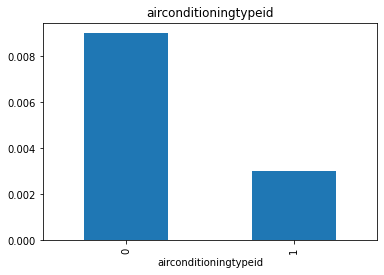

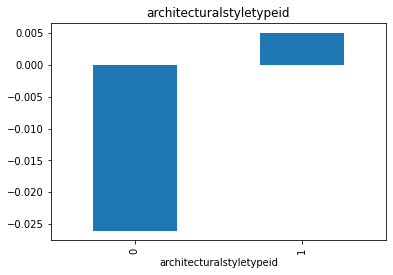

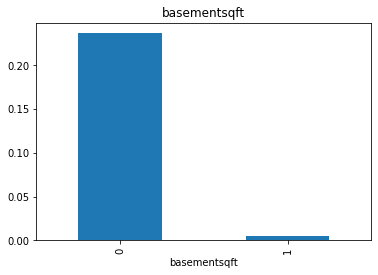

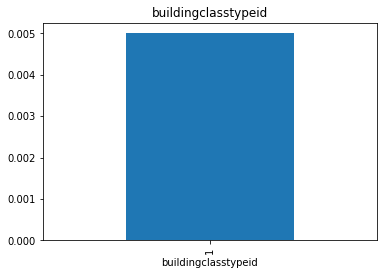

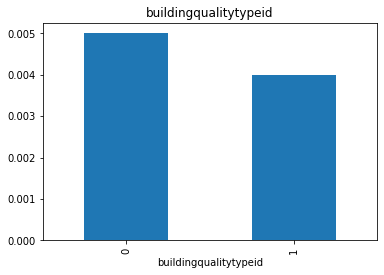

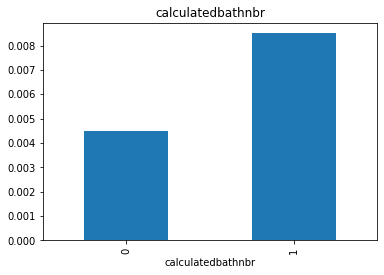

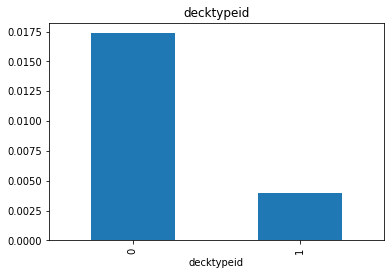

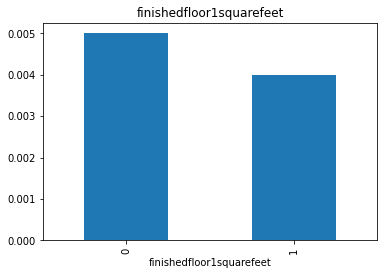

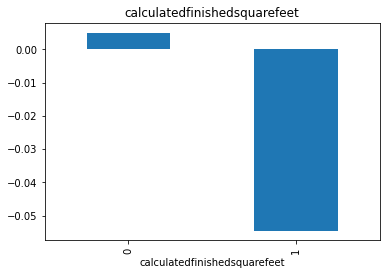

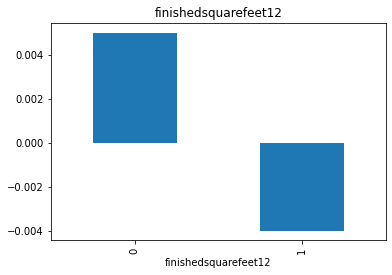

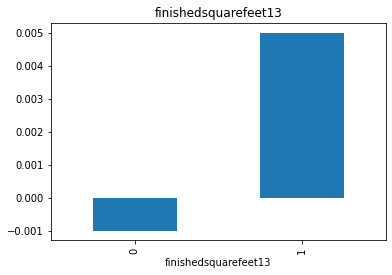

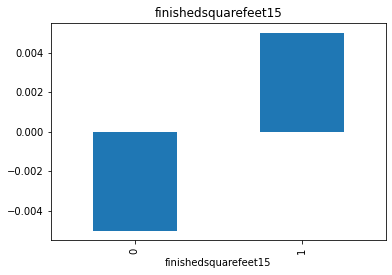

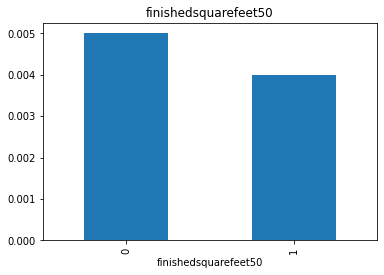

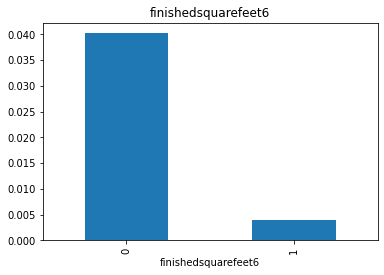

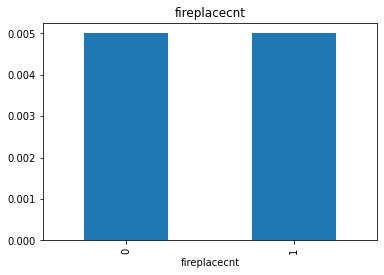

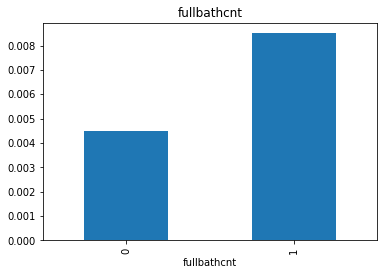

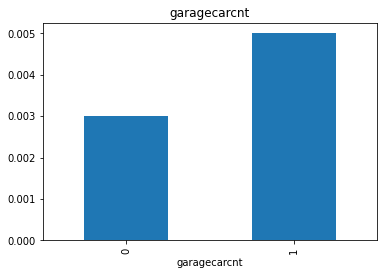

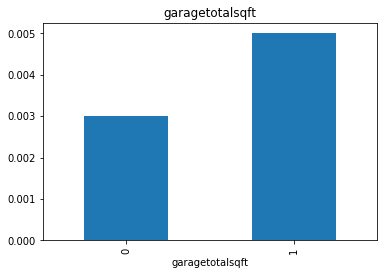

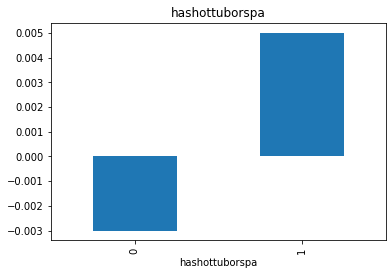

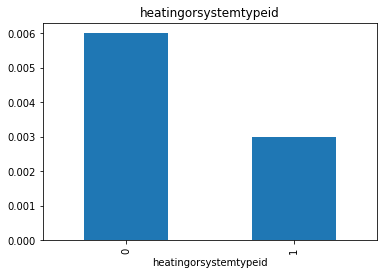

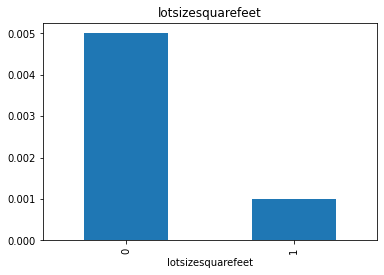

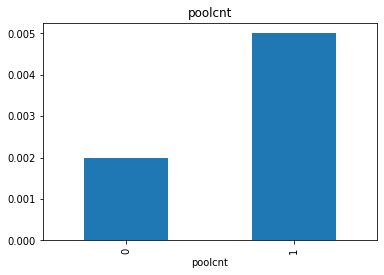

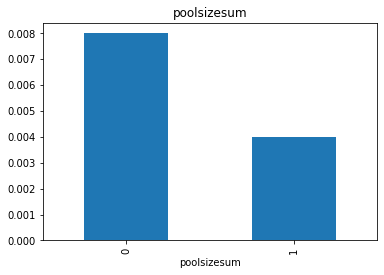

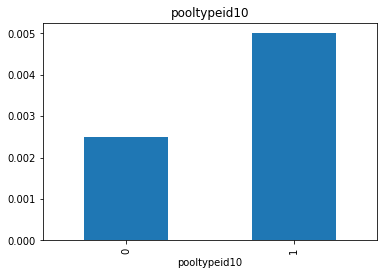

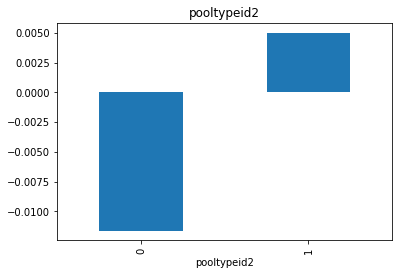

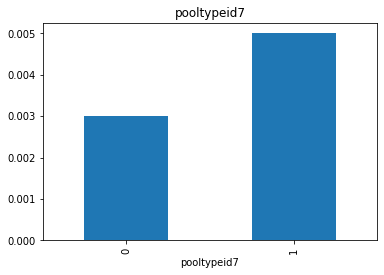

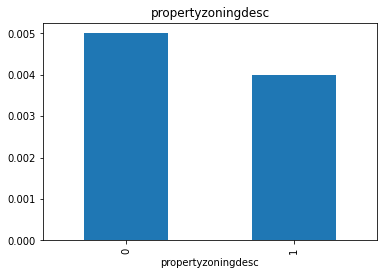

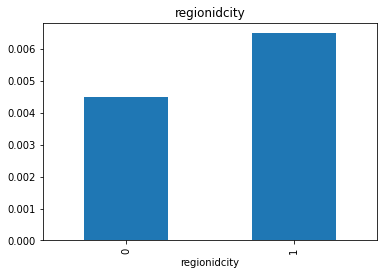

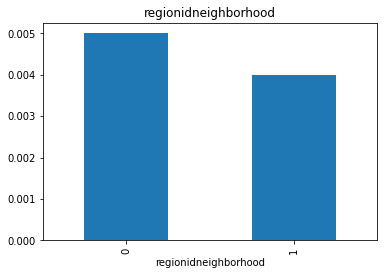

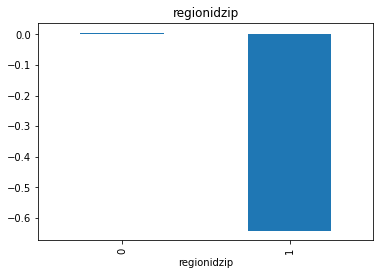

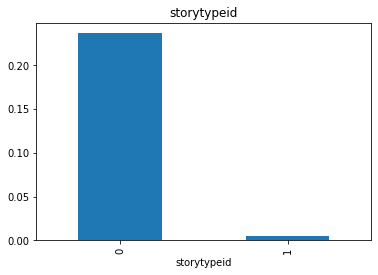

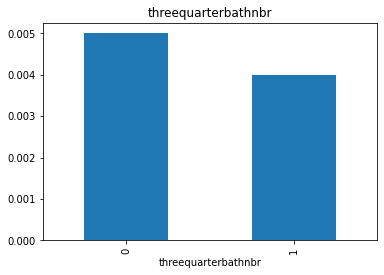

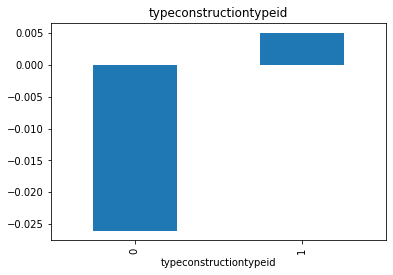

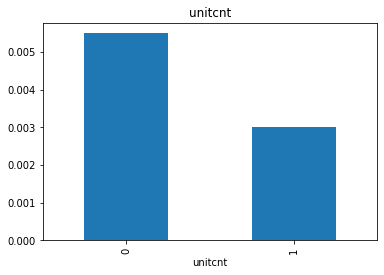

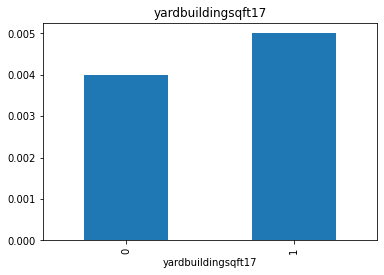

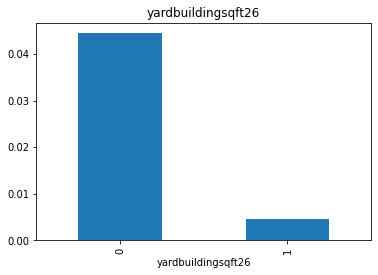

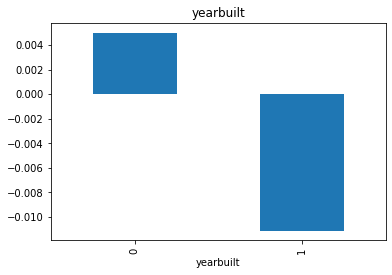

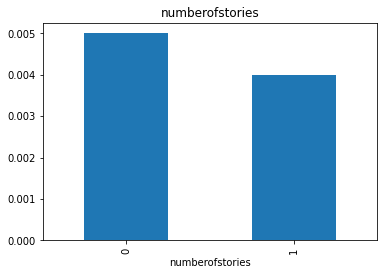

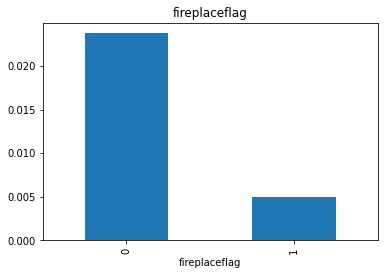

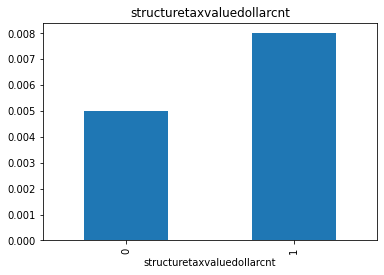

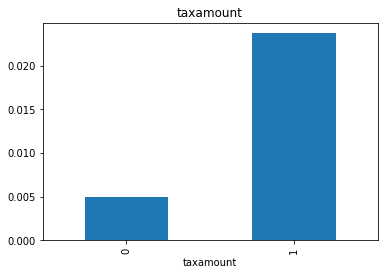

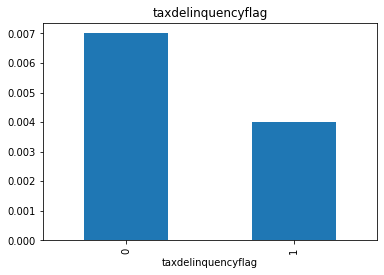

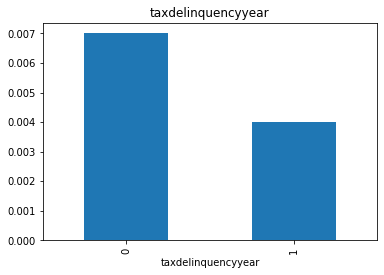

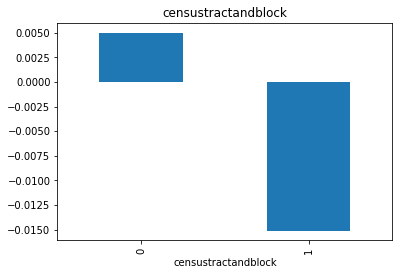

In [ ]:
def analyze_missing_values(df, var):
    new_df = df.copy()
    
    new_df[var] = np.where(new_df[var].isnull(), 1, 0)  
    # here 1 represents that there is missing value and 0 represents no missing values
    
    new_df.groupby(var)['logerror'].median().plot.bar()
    
    plt.title(var)
    plt.show()
    
for var in mis_val:
    analyze_missing_values(zillow_df, var)

In [ ]:
print("Total no of variables with missing value in the dataset: ", len(mis_val))

Total no of variables with missing value in the dataset:  44


In [ ]:
num_vars = [var for var in zillow_df.columns if zillow_df[var].dtypes!= 'O'] # Non-Object Variables
print("Total no.of numerical variables in the dataset: ", len(num_vars))

Total no.of numerical variables in the dataset:  54


In [ ]:
zillow_df[num_vars].head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
0,17073783,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,548.0,1264.0,1264.0,NaN,NaN,548.0,NaN,6111.0,NaN,2.0,2.0,0.0,NaN,34303597.0,-119287236.0,1735.0,NaN,NaN,NaN,NaN,NaN,265.0,6.111002e+07,34543.0,2061.0,NaN,97081.0,5.0,NaN,1.0,NaN,NaN,128.0,NaN,1986.0,2.0,115087.0,191811.0,2015.0,76724.0,2015.06,NaN,6.111002e+13,0.0953
1,17088994,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,777.0,777.0,777.0,NaN,NaN,777.0,NaN,6111.0,NaN,1.0,1.0,0.0,NaN,34272866.0,-119198911.0,NaN,NaN,NaN,NaN,NaN,NaN,266.0,6.111002e+07,34543.0,2061.0,NaN,97083.0,4.0,NaN,NaN,NaN,NaN,198.0,NaN,1990.0,1.0,143809.0,239679.0,2015.0,95870.0,2581.30,NaN,6.111002e+13,0.0198
2,17100444,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,1101.0,1101.0,1101.0,NaN,NaN,1101.0,NaN,6111.0,NaN,2.0,2.0,441.0,NaN,34340801.0,-119079610.0,6569.0,NaN,NaN,NaN,NaN,NaN,261.0,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1956.0,1.0,33619.0,47853.0,2015.0,14234.0,591.64,NaN,6.111001e+13,0.0060
3,17102429,NaN,NaN,NaN,1.5,2.0,NaN,NaN,1.5,NaN,1554.0,1554.0,1554.0,NaN,NaN,1554.0,NaN,6111.0,1.0,1.0,2.0,460.0,NaN,34354313.0,-119076405.0,7400.0,NaN,NaN,NaN,NaN,NaN,261.0,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN,1965.0,1.0,45609.0,62914.0,2015.0,17305.0,682.78,NaN,6.111001e+13,-0.0566
4,17109604,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,1305.0,2415.0,2415.0,NaN,NaN,1305.0,NaN,6111.0,1.0,2.0,2.0,665.0,NaN,34266578.0,-119165392.0,6326.0,NaN,NaN,NaN,NaN,NaN,261.0,6.111001e+07,34543.0,2061.0,NaN,97084.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1984.0,2.0,277000.0,554000.0,2015.0,277000.0,5886.92,NaN,6.111001e+13,0.0573


In [ ]:
cat_vars = [var for var in zillow_df.columns if zillow_df[var].dtypes == 'O'] # Object Variables
print("Total no.of categorical variables in the dataset: ", len(cat_vars))

Total no.of categorical variables in the dataset:  6


In [ ]:
zillow_df[cat_vars].head()

,hashottuborspa,propertycountylandusecode,propertyzoningdesc,fireplaceflag,taxdelinquencyflag,transactiondate
0,NaN,1128,NaN,NaN,NaN,2016-01-27
1,NaN,1129,NaN,NaN,NaN,2016-03-30
2,NaN,1111,NaN,NaN,NaN,2016-05-27
3,NaN,1110,NaN,NaN,NaN,2016-06-07
4,NaN,1111,NaN,NaN,NaN,2016-08-08


In [ ]:
for var in cat_vars:
    print(var,'-->', len(zillow_df[var].unique()), "Categories")

hashottuborspa --> 2 Categories
propertycountylandusecode --> 37 Categories
propertyzoningdesc --> 504 Categories
fireplaceflag --> 2 Categories
taxdelinquencyflag --> 2 Categories
transactiondate --> 263 Categories


In [ ]:
### Analyzing Rarely occuring Labels

def analyze_rare_labels(df, var, rare_percentage):
    new_df = df.copy()
    
    # determine the % of observations per category
    tmp = new_df.groupby(var)['logerror'].count() / len(new_df)
    
    # return categories that are rare
    return tmp[tmp < rare_percentage]

# print categories that are present in less than 1% of the observations
for var in cat_vars:
    print(analyze_rare_labels(zillow_df, var, 0.01))
    print()

Series([], Name: logerror, dtype: float64)

propertycountylandusecode
0103    0.000727
0104    0.004000
0109    0.001091
010G    0.001818
010H    0.000364
010M    0.000364
010V    0.001455
012C    0.004727
01DC    0.004000
01HC    0.002182
020G    0.000364
0300    0.003636
0400    0.005455
0700    0.000727
100V    0.000364
1112    0.000364
1116    0.000364
1117    0.001091
1128    0.002545
1210    0.001091
1222    0.001091
1321    0.000364
38      0.001455
73      0.000364
96      0.001091
Name: logerror, dtype: float64

propertyzoningdesc
AH RM-CD*     0.000364
AH RM-CD-F    0.000364
AHA110000*    0.000364
AHR17000*     0.000364
AHR3-R325U    0.000364
                ...   
WHR1YY        0.000727
WHR2YY        0.000364
WHRE*         0.000364
WVRPD112U*    0.000364
WVRPD12U-R    0.000364
Name: logerror, Length: 494, dtype: float64

fireplaceflag
True    0.000727
Name: logerror, dtype: float64

Series([], Name: logerror, dtype: float64)

transactiondate
2016-01-03    0.000364
2016-01-04

In [ ]:
year_var = [var for var in num_vars if 'Yr' in var or 'year' in var ]
len(year_var), year_var

(3, ['yearbuilt', 'assessmentyear', 'taxdelinquencyyear'])

Text(0.5, 1.0, 'Year Difference vs Logerror')

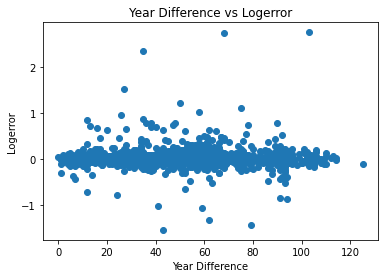

In [ ]:
new_df = zillow_df.copy()

# Difference between year variable and year the house was sold
new_df[var] = new_df['assessmentyear'] - new_df['yearbuilt']    

plt.scatter(new_df[var],new_df['logerror'])
plt.xlabel('Year Difference')
plt.ylabel('Logerror')
plt.title('Year Difference vs Logerror')

In [ ]:
discrete_vars = [var for var in num_vars if len(zillow_df[var].unique()) < 20]

print('No.of discrete variables: ', len(discrete_vars))

No.of discrete variables:  31


In [ ]:
zillow_df[discrete_vars].head()

,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedsquarefeet13,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,heatingorsystemtypeid,poolcnt,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,regionidcounty,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft26,numberofstories,assessmentyear,taxdelinquencyyear
0,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,NaN,NaN,6111.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,265.0,2061.0,5.0,NaN,1.0,NaN,NaN,NaN,2.0,2015.0,NaN
1,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,6111.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,266.0,2061.0,4.0,NaN,NaN,NaN,NaN,NaN,1.0,2015.0,NaN
2,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,NaN,NaN,6111.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,261.0,2061.0,5.0,NaN,NaN,NaN,NaN,NaN,1.0,2015.0,NaN
3,NaN,NaN,NaN,1.5,2.0,NaN,NaN,1.5,NaN,NaN,NaN,6111.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,261.0,2061.0,5.0,NaN,1.0,NaN,NaN,NaN,1.0,2015.0,NaN
4,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,NaN,NaN,6111.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,261.0,2061.0,8.0,NaN,1.0,NaN,NaN,NaN,2.0,2015.0,NaN


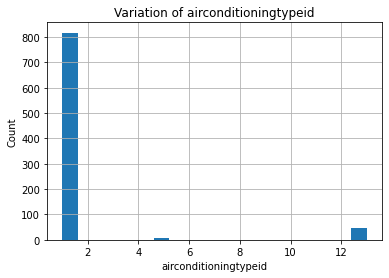

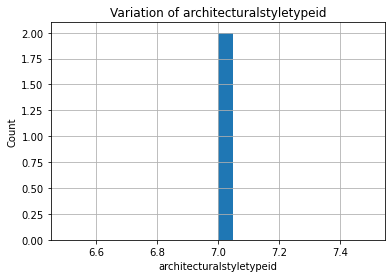

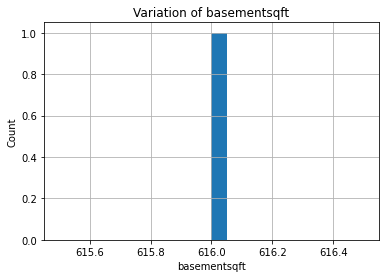

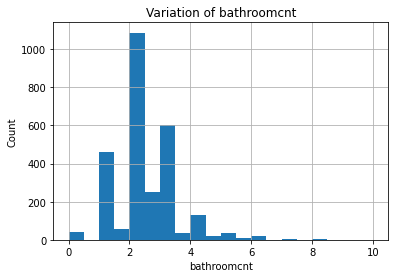

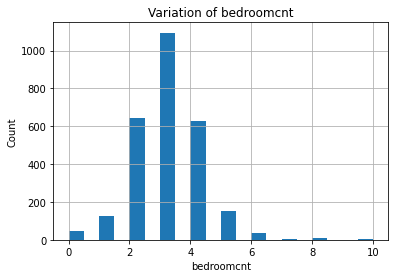

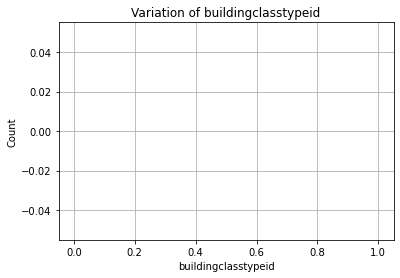

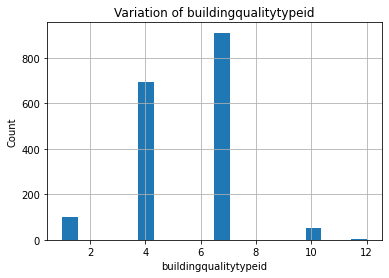

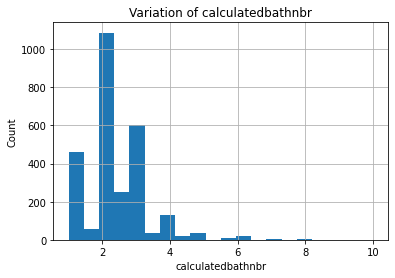

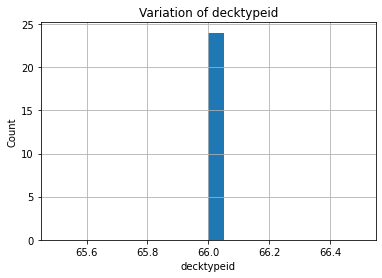

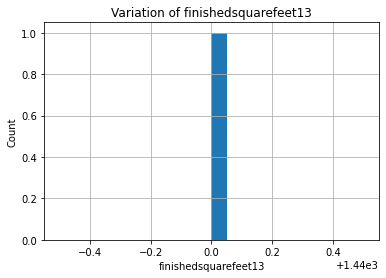

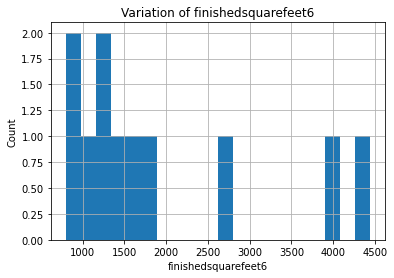

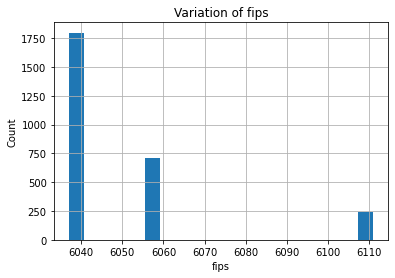

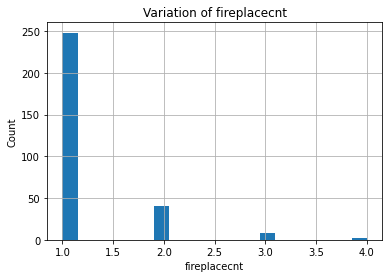

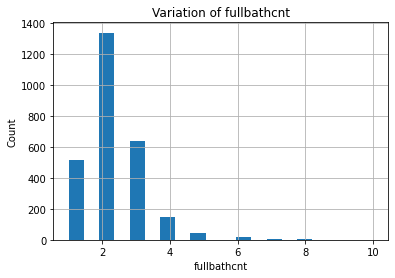

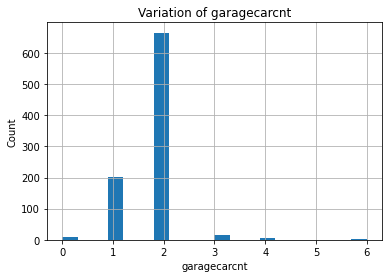

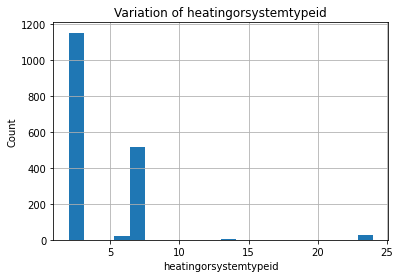

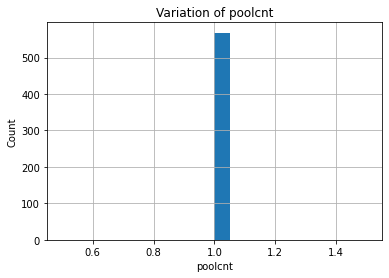

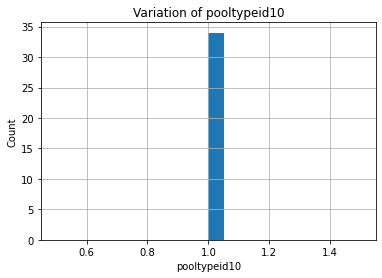

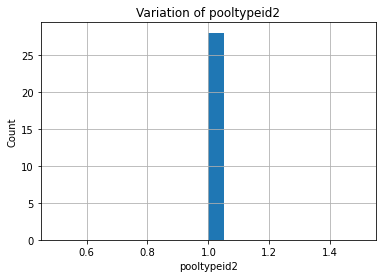

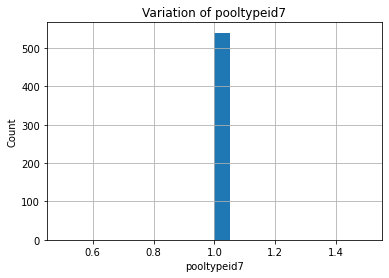

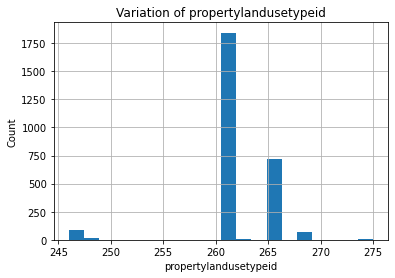

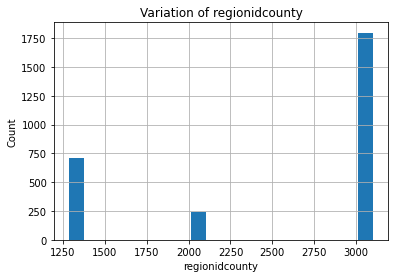

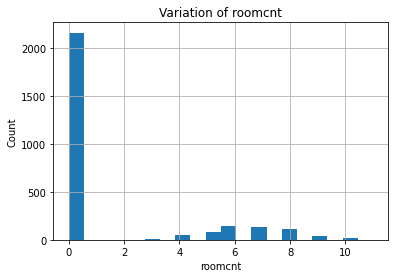

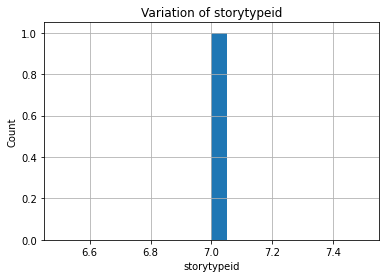

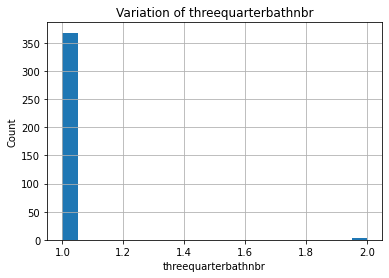

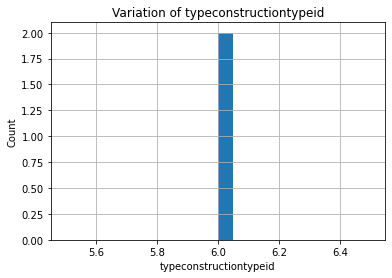

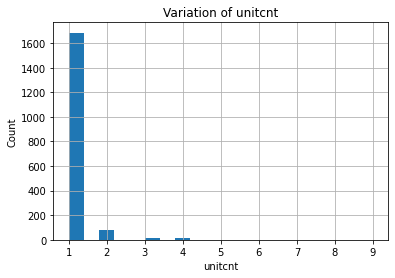

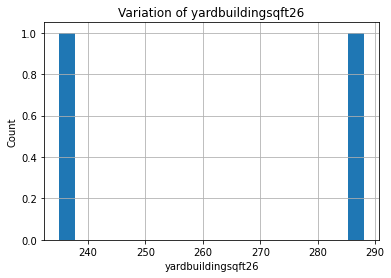

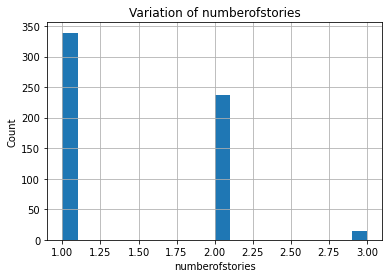

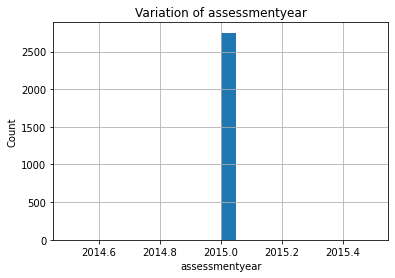

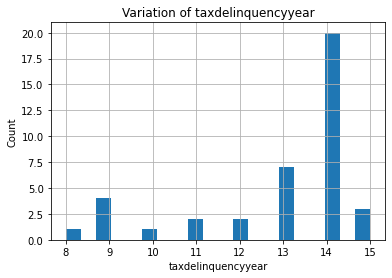

In [ ]:
def analyze_disc_vars(df,var):
    
    new_df = zillow_df.copy()
    new_df[var].hist(bins=20)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title('Variation of '+ var)
    plt.show()
    
for var in discrete_vars:
    analyze_disc_vars(zillow_df,var)

In [ ]:
cont_vars = [var for var in num_vars if var not in discrete_vars and year_var]
print('No of continuous variables : ', len(cont_vars))

No of continuous variables :  23


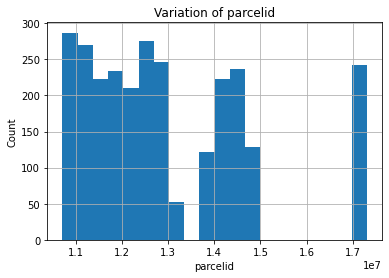

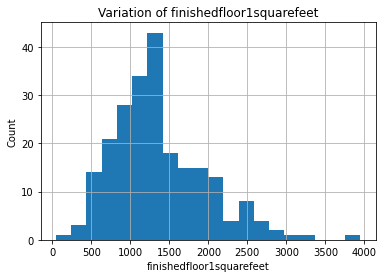

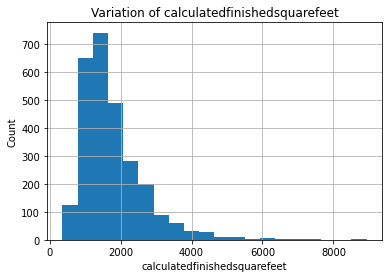

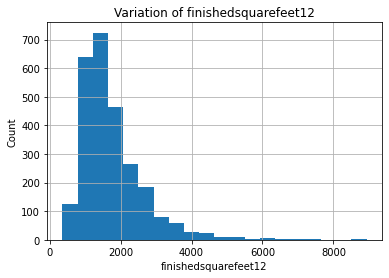

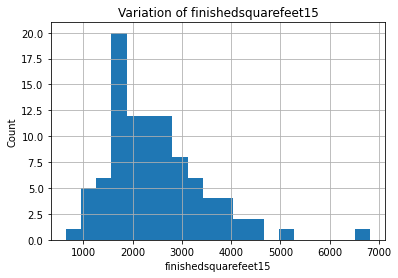

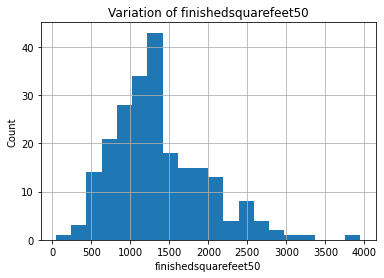

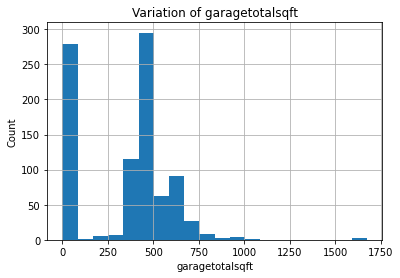

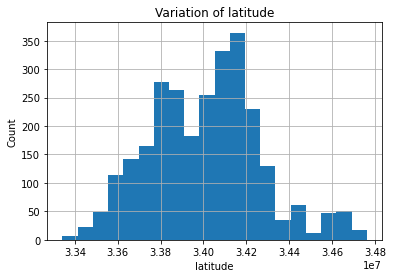

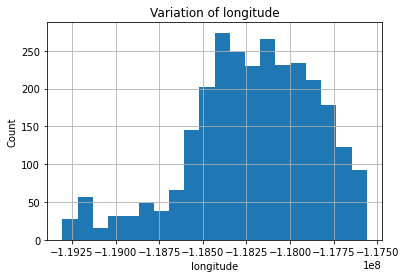

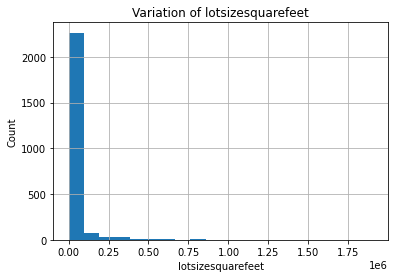

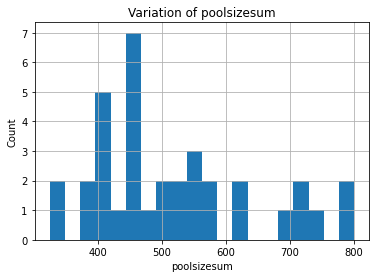

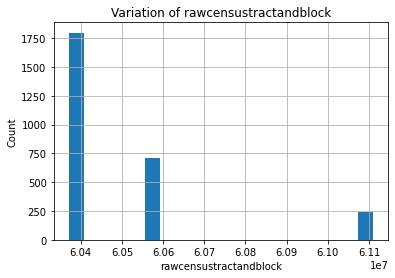

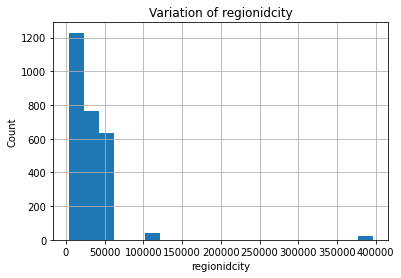

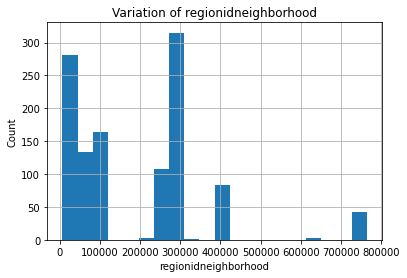

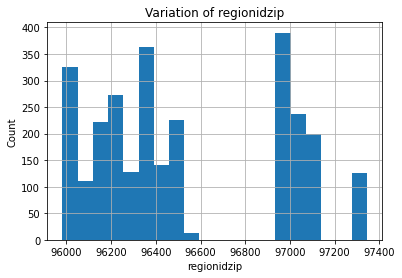

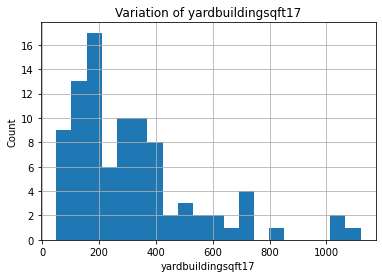

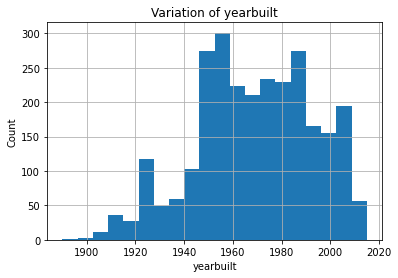

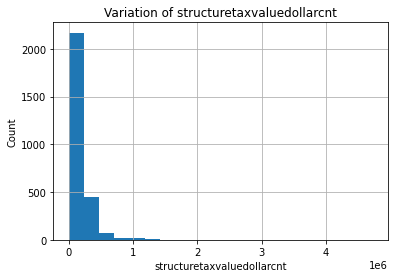

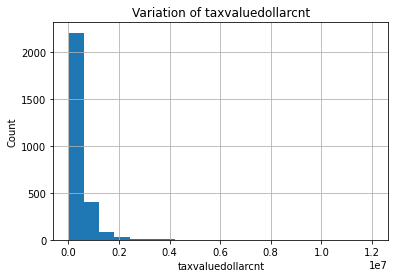

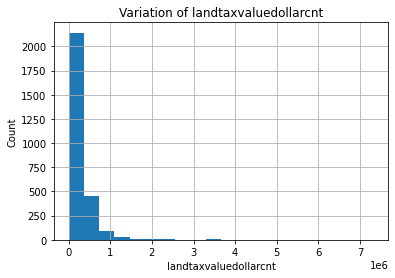

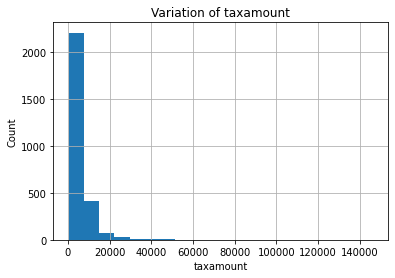

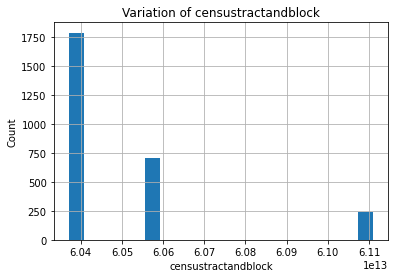

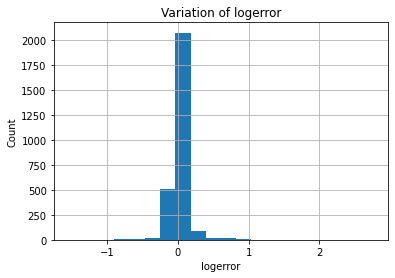

In [ ]:
def analyze_cont_vars(df,var):
    
    new_df = zillow_df.copy()
    new_df[var].hist(bins=20)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title('Variation of '+ var)
    plt.show()
    
for var in cont_vars:
    analyze_cont_vars(zillow_df,var)

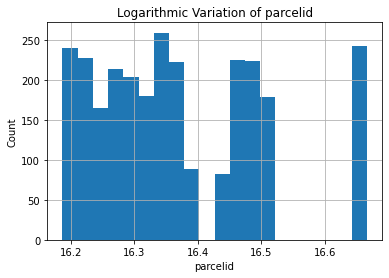

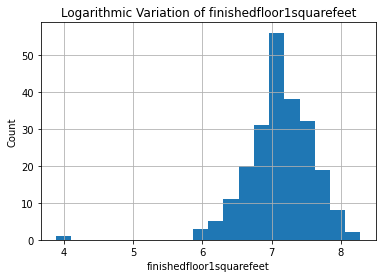

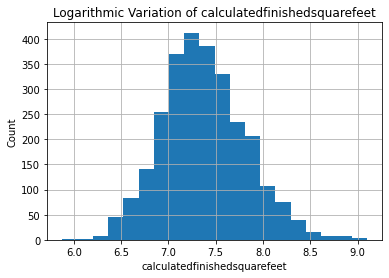

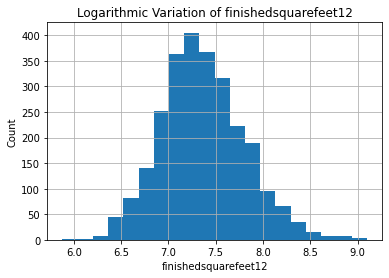

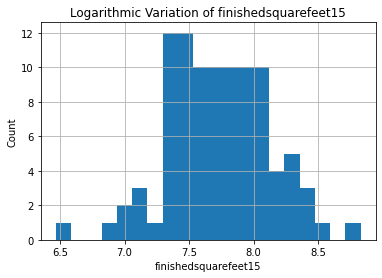

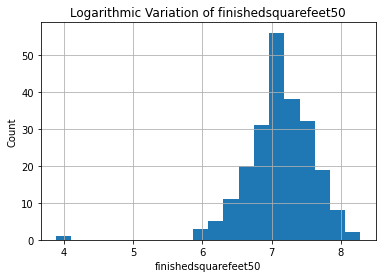

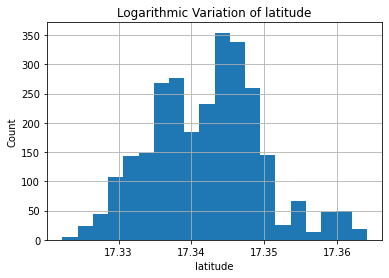

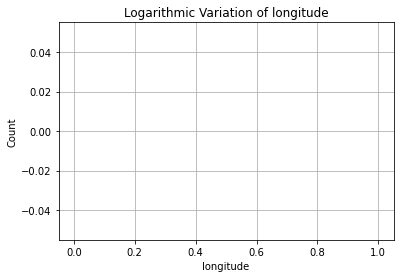

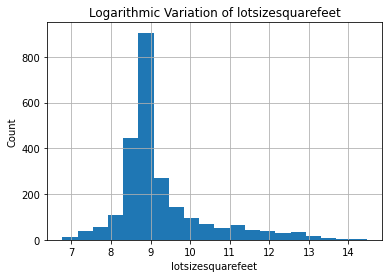

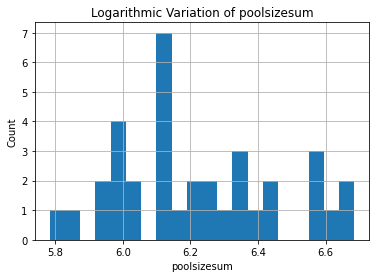

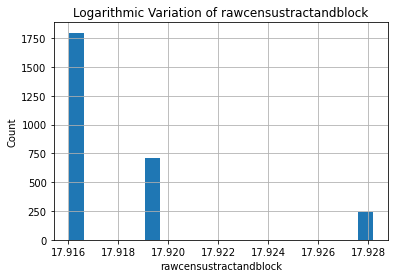

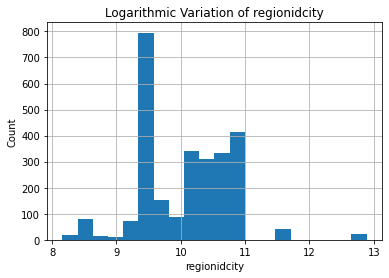

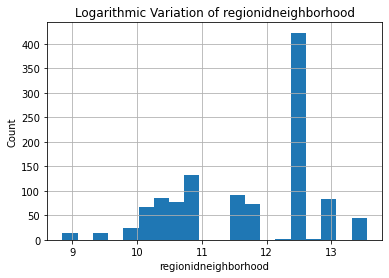

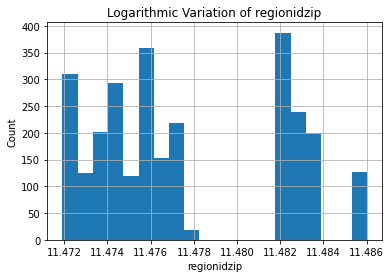

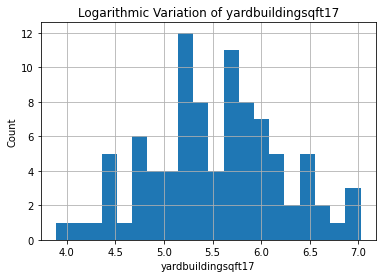

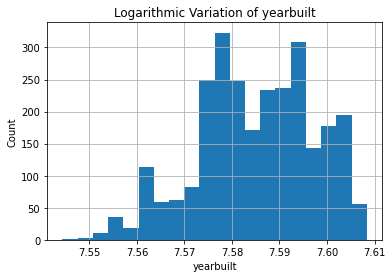

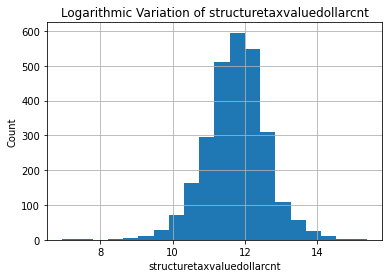

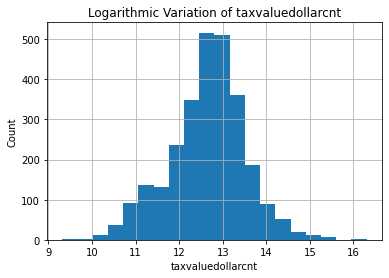

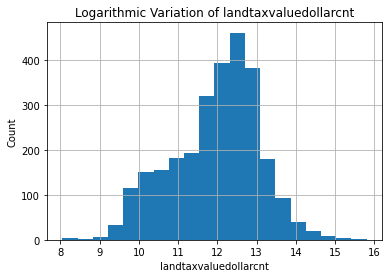

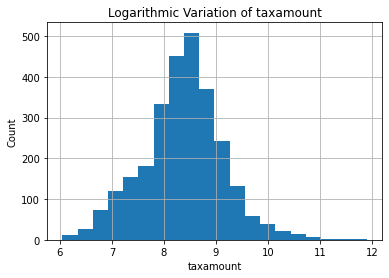

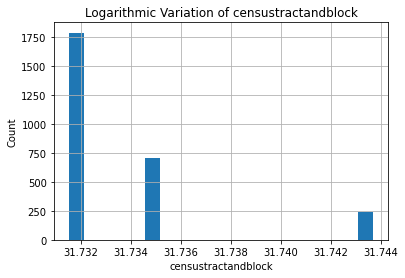

In [ ]:
# log Transformation of variables

def analyze_log_variation(df,var):
    
    new_df = df.copy()
    if 0 in new_df[var].unique():
        pass                 
    # Hence log(0) = undefined

    else:
        
        new_df[var] = np.log(new_df[var])
        new_df[var].hist(bins=20)
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.title('Logarithmic Variation of '+ var)
        plt.show()
        
for var in cont_vars:
    analyze_log_variation(zillow_df,var)

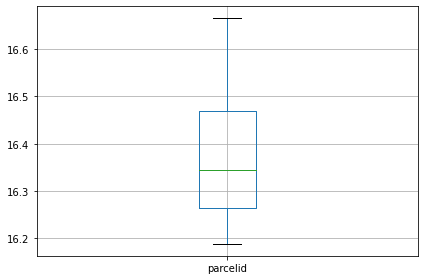

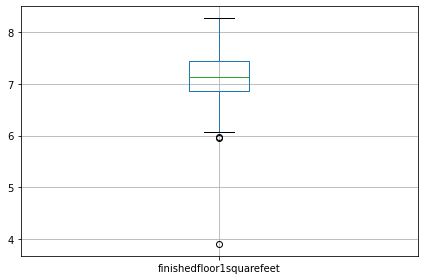

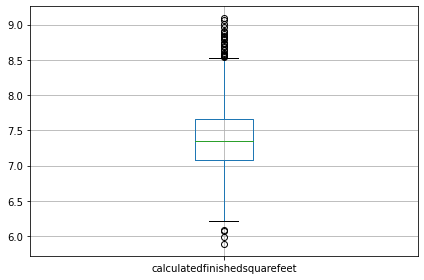

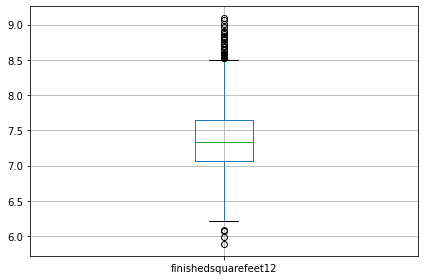

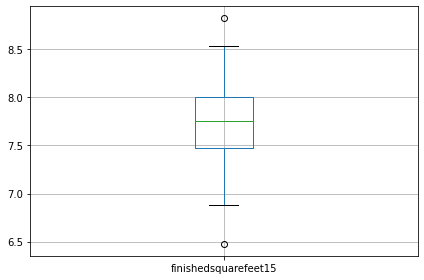

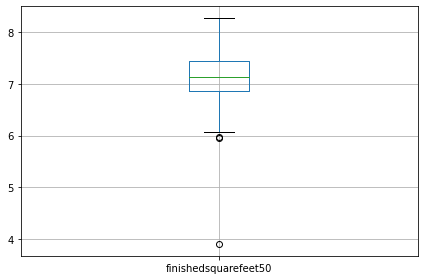

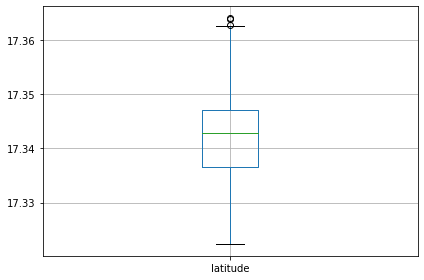

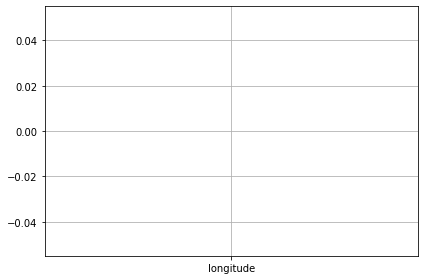

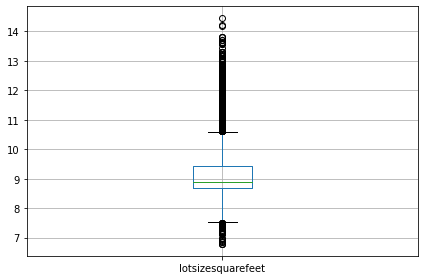

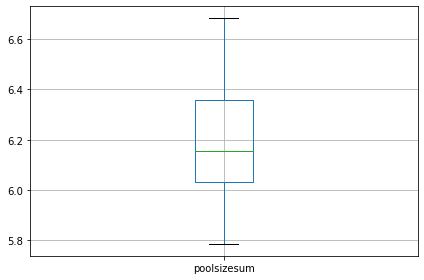

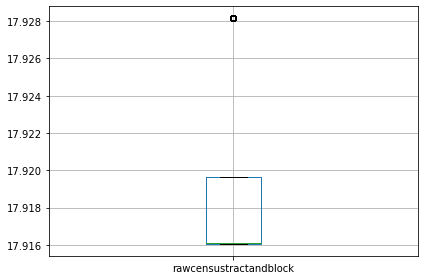

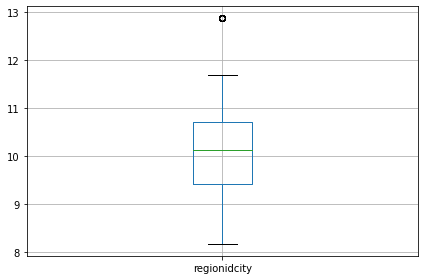

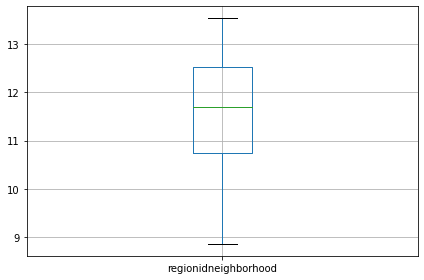

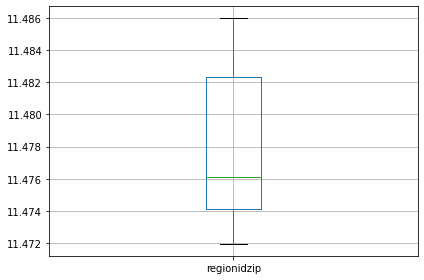

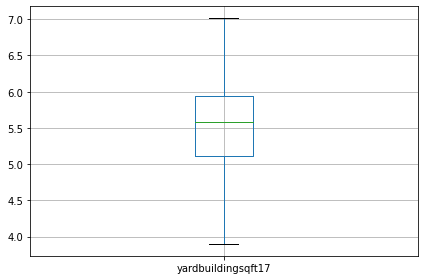

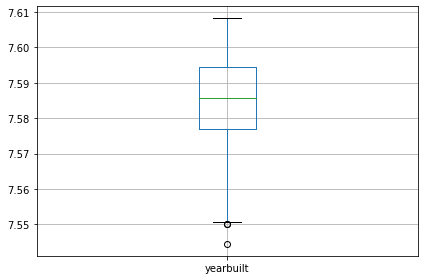

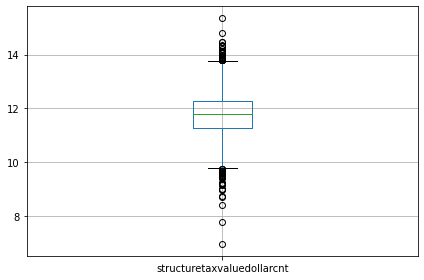

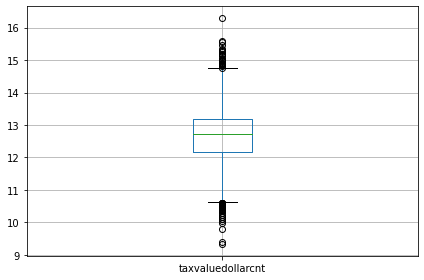

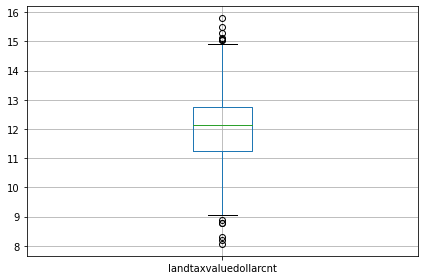

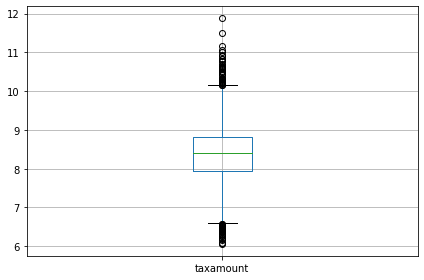

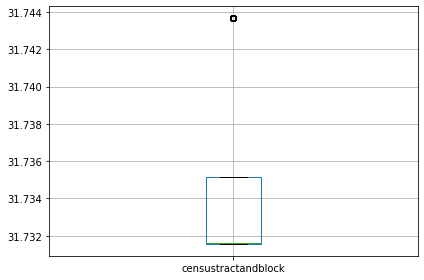

In [ ]:
def analyze_outliers(df,var):
    
    new_df = df.copy()
    
    if 0 in new_df[var].unique():
        pass
    
    else:
        new_df[var] = np.log(df[var])
        new_df.boxplot(column=var)
        plt.tight_layout()
        plt.show()
        
for var in cont_vars:
    analyze_outliers(zillow_df,var)
    print('\n')

In [ ]:
zillow_df.to_csv('zillow_initial_dataset.csv', index=False)

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import math as mt
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
pd.set_option('display.max_columns',None)
warnings.simplefilter(action='ignore')

In [ ]:
# Loading the dataset
df = pd.read_csv('./zillow_initial_dataset.csv')
df_copy = df.copy()
df.shape

(2750, 60)

In [ ]:
df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,17073783,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,548.0,1264.0,1264.0,NaN,NaN,548.0,NaN,6111.0,NaN,2.0,2.0,0.0,NaN,NaN,34303597.0,-119287236.0,1735.0,NaN,NaN,NaN,NaN,NaN,1128,265.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97081.0,5.0,NaN,1.0,NaN,NaN,128.0,NaN,1986.0,2.0,NaN,115087.0,191811.0,2015.0,76724.0,2015.06,NaN,NaN,6.111002e+13,0.0953,2016-01-27
1,17088994,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,777.0,777.0,777.0,NaN,NaN,777.0,NaN,6111.0,NaN,1.0,1.0,0.0,NaN,NaN,34272866.0,-119198911.0,NaN,NaN,NaN,NaN,NaN,NaN,1129,266.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97083.0,4.0,NaN,NaN,NaN,NaN,198.0,NaN,1990.0,1.0,NaN,143809.0,239679.0,2015.0,95870.0,2581.30,NaN,NaN,6.111002e+13,0.0198,2016-03-30
2,17100444,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,1101.0,1101.0,1101.0,NaN,NaN,1101.0,NaN,6111.0,NaN,2.0,2.0,441.0,NaN,NaN,34340801.0,-119079610.0,6569.0,NaN,NaN,NaN,NaN,NaN,1111,261.0,NaN,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1956.0,1.0,NaN,33619.0,47853.0,2015.0,14234.0,591.64,NaN,NaN,6.111001e+13,0.0060,2016-05-27
3,17102429,NaN,NaN,NaN,1.5,2.0,NaN,NaN,1.5,NaN,1554.0,1554.0,1554.0,NaN,NaN,1554.0,NaN,6111.0,1.0,1.0,2.0,460.0,NaN,NaN,34354313.0,-119076405.0,7400.0,NaN,NaN,NaN,NaN,NaN,1110,261.0,NaN,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN,1965.0,1.0,NaN,45609.0,62914.0,2015.0,17305.0,682.78,NaN,NaN,6.111001e+13,-0.0566,2016-06-07
4,17109604,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,1305.0,2415.0,2415.0,NaN,NaN,1305.0,NaN,6111.0,1.0,2.0,2.0,665.0,NaN,NaN,34266578.0,-119165392.0,6326.0,NaN,NaN,NaN,NaN,NaN,1111,261.0,NaN,6.111001e+07,34543.0,2061.0,NaN,97084.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1984.0,2.0,NaN,277000.0,554000.0,2015.0,277000.0,5886.92,NaN,NaN,6.111001e+13,0.0573,2016-08-08


In [ ]:
duplicate = df[df.duplicated('parcelid')]
duplicate.shape

(6, 60)

In [ ]:
df.drop_duplicates(subset ="parcelid", keep = 'first', inplace = True)
df.shape

(2744, 60)

In [ ]:
df.isnull().mean()*100

parcelid                          0.000000
airconditioningtypeid            68.294461
architecturalstyletypeid         99.927114
basementsqft                     99.963557
bathroomcnt                       0.000000
bedroomcnt                        0.000000
buildingclasstypeid             100.000000
buildingqualitytypeid            35.896501
calculatedbathnbr                 1.457726
decktypeid                       99.125364
finishedfloor1squarefeet         91.763848
calculatedfinishedsquarefeet      0.692420
finishedsquarefeet12              4.628280
finishedsquarefeet13             99.963557
finishedsquarefeet15             96.501458
finishedsquarefeet50             91.763848
finishedsquarefeet6              99.599125
fips                              0.000000
fireplacecnt                     89.103499
fullbathcnt                       1.457726
garagecarcnt                     67.346939
garagetotalsqft                  67.346939
hashottuborspa                   97.740525
heatingorsy

In [ ]:
def drop_columns_with_max_missing_values(df):
    mis_var = [var for var in df.columns if df[var].isnull().sum() > 0]
    df[mis_var].isnull().sum()

    limit = np.abs((df.shape[0] * 0.6))
    var_to_be_dropped = [var for var in mis_var if df[var].isnull().sum() > limit]
    
    print('Columns with more than 60% missing values: \n', var_to_be_dropped)
    print('\n---- Dropping columns with more than 60% missing values ----\n')

    df.drop(columns=var_to_be_dropped, axis=1, inplace=True)
    
    print('Remaining columns are: \n', df.columns)
    return df

df = drop_columns_with_max_missing_values(df)

Columns with more than 60% missing values: 
 ['airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft', 'buildingclasstypeid', 'decktypeid', 'finishedfloor1squarefeet', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6', 'fireplacecnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid', 'yardbuildingsqft17', 'yardbuildingsqft26', 'numberofstories', 'fireplaceflag', 'taxdelinquencyflag', 'taxdelinquencyyear']

---- Dropping columns with more than 60% missing values ----

Remaining columns are: 
 Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fips', 'fullbathcnt', 'heatingorsystemtypeid',
       'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'proper

In [ ]:
df.shape

(2744, 32)

In [ ]:
df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate
0,17073783,2.5,3.0,NaN,2.5,1264.0,1264.0,6111.0,2.0,NaN,34303597.0,-119287236.0,1735.0,1128,265.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97081.0,5.0,NaN,1986.0,115087.0,191811.0,2015.0,76724.0,2015.06,6.111002e+13,0.0953,2016-01-27
1,17088994,1.0,2.0,NaN,1.0,777.0,777.0,6111.0,1.0,NaN,34272866.0,-119198911.0,NaN,1129,266.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97083.0,4.0,NaN,1990.0,143809.0,239679.0,2015.0,95870.0,2581.30,6.111002e+13,0.0198,2016-03-30
2,17100444,2.0,3.0,NaN,2.0,1101.0,1101.0,6111.0,2.0,NaN,34340801.0,-119079610.0,6569.0,1111,261.0,NaN,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,NaN,1956.0,33619.0,47853.0,2015.0,14234.0,591.64,6.111001e+13,0.0060,2016-05-27
3,17102429,1.5,2.0,NaN,1.5,1554.0,1554.0,6111.0,1.0,NaN,34354313.0,-119076405.0,7400.0,1110,261.0,NaN,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,NaN,1965.0,45609.0,62914.0,2015.0,17305.0,682.78,6.111001e+13,-0.0566,2016-06-07
4,17109604,2.5,4.0,NaN,2.5,2415.0,2415.0,6111.0,2.0,NaN,34266578.0,-119165392.0,6326.0,1111,261.0,NaN,6.111001e+07,34543.0,2061.0,NaN,97084.0,8.0,NaN,1984.0,277000.0,554000.0,2015.0,277000.0,5886.92,6.111001e+13,0.0573,2016-08-08


In [ ]:
df['yeardifference'] = df['assessmentyear'] - df['yearbuilt']
df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,yeardifference
0,17073783,2.5,3.0,NaN,2.5,1264.0,1264.0,6111.0,2.0,NaN,34303597.0,-119287236.0,1735.0,1128,265.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97081.0,5.0,NaN,1986.0,115087.0,191811.0,2015.0,76724.0,2015.06,6.111002e+13,0.0953,2016-01-27,29.0
1,17088994,1.0,2.0,NaN,1.0,777.0,777.0,6111.0,1.0,NaN,34272866.0,-119198911.0,NaN,1129,266.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97083.0,4.0,NaN,1990.0,143809.0,239679.0,2015.0,95870.0,2581.30,6.111002e+13,0.0198,2016-03-30,25.0
2,17100444,2.0,3.0,NaN,2.0,1101.0,1101.0,6111.0,2.0,NaN,34340801.0,-119079610.0,6569.0,1111,261.0,NaN,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,NaN,1956.0,33619.0,47853.0,2015.0,14234.0,591.64,6.111001e+13,0.0060,2016-05-27,59.0
3,17102429,1.5,2.0,NaN,1.5,1554.0,1554.0,6111.0,1.0,NaN,34354313.0,-119076405.0,7400.0,1110,261.0,NaN,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,NaN,1965.0,45609.0,62914.0,2015.0,17305.0,682.78,6.111001e+13,-0.0566,2016-06-07,50.0
4,17109604,2.5,4.0,NaN,2.5,2415.0,2415.0,6111.0,2.0,NaN,34266578.0,-119165392.0,6326.0,1111,261.0,NaN,6.111001e+07,34543.0,2061.0,NaN,97084.0,8.0,NaN,1984.0,277000.0,554000.0,2015.0,277000.0,5886.92,6.111001e+13,0.0573,2016-08-08,31.0


In [ ]:
df.drop(columns=['assessmentyear', 'yearbuilt', 'transactiondate'], axis=1, inplace=True)
df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,unitcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,yeardifference
0,17073783,2.5,3.0,NaN,2.5,1264.0,1264.0,6111.0,2.0,NaN,34303597.0,-119287236.0,1735.0,1128,265.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97081.0,5.0,NaN,115087.0,191811.0,76724.0,2015.06,6.111002e+13,0.0953,29.0
1,17088994,1.0,2.0,NaN,1.0,777.0,777.0,6111.0,1.0,NaN,34272866.0,-119198911.0,NaN,1129,266.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97083.0,4.0,NaN,143809.0,239679.0,95870.0,2581.30,6.111002e+13,0.0198,25.0
2,17100444,2.0,3.0,NaN,2.0,1101.0,1101.0,6111.0,2.0,NaN,34340801.0,-119079610.0,6569.0,1111,261.0,NaN,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,NaN,33619.0,47853.0,14234.0,591.64,6.111001e+13,0.0060,59.0
3,17102429,1.5,2.0,NaN,1.5,1554.0,1554.0,6111.0,1.0,NaN,34354313.0,-119076405.0,7400.0,1110,261.0,NaN,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,NaN,45609.0,62914.0,17305.0,682.78,6.111001e+13,-0.0566,50.0
4,17109604,2.5,4.0,NaN,2.5,2415.0,2415.0,6111.0,2.0,NaN,34266578.0,-119165392.0,6326.0,1111,261.0,NaN,6.111001e+07,34543.0,2061.0,NaN,97084.0,8.0,NaN,277000.0,554000.0,277000.0,5886.92,6.111001e+13,0.0573,31.0


In [ ]:
df[['latitude', 'longitude']] = (df[['latitude', 'longitude']])/(10**6)

df['censustractandblock'] = (df['censustractandblock'])/(10**12)

df['rawcensustractandblock'] = (df['rawcensustractandblock'])/(10**6)

df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,unitcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,yeardifference
0,17073783,2.5,3.0,NaN,2.5,1264.0,1264.0,6111.0,2.0,NaN,34.303597,-119.287236,1735.0,1128,265.0,NaN,61.110022,34543.0,2061.0,NaN,97081.0,5.0,NaN,115087.0,191811.0,76724.0,2015.06,61.110022,0.0953,29.0
1,17088994,1.0,2.0,NaN,1.0,777.0,777.0,6111.0,1.0,NaN,34.272866,-119.198911,NaN,1129,266.0,NaN,61.110015,34543.0,2061.0,NaN,97083.0,4.0,NaN,143809.0,239679.0,95870.0,2581.30,61.110015,0.0198,25.0
2,17100444,2.0,3.0,NaN,2.0,1101.0,1101.0,6111.0,2.0,NaN,34.340801,-119.079610,6569.0,1111,261.0,NaN,61.110007,26965.0,2061.0,NaN,97113.0,5.0,NaN,33619.0,47853.0,14234.0,591.64,61.110007,0.0060,59.0
3,17102429,1.5,2.0,NaN,1.5,1554.0,1554.0,6111.0,1.0,NaN,34.354313,-119.076405,7400.0,1110,261.0,NaN,61.110008,26965.0,2061.0,NaN,97113.0,5.0,NaN,45609.0,62914.0,17305.0,682.78,61.110008,-0.0566,50.0
4,17109604,2.5,4.0,NaN,2.5,2415.0,2415.0,6111.0,2.0,NaN,34.266578,-119.165392,6326.0,1111,261.0,NaN,61.110014,34543.0,2061.0,NaN,97084.0,8.0,NaN,277000.0,554000.0,277000.0,5886.92,61.110014,0.0573,31.0


In [ ]:
df.isnull().sum()

parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
buildingqualitytypeid            985
calculatedbathnbr                 40
calculatedfinishedsquarefeet      19
finishedsquarefeet12             127
fips                               0
fullbathcnt                       40
heatingorsystemtypeid           1026
latitude                           0
longitude                          0
lotsizesquarefeet                319
propertycountylandusecode          0
propertylandusetypeid              0
propertyzoningdesc               953
rawcensustractandblock             0
regionidcity                      58
regionidcounty                     0
regionidneighborhood            1614
regionidzip                        1
roomcnt                            0
unitcnt                          957
structuretaxvaluedollarcnt        11
taxvaluedollarcnt                  0
landtaxvaluedollarcnt              0
taxamount                          1
c

In [ ]:
def replace_missing_data(df, mis_vars):
    print('##### Replacing missing values with mode of features #####')
    for var in mis_vars:
        df[var] = df[var].fillna(df[var].mode()[0])
    return df

mis_var = [var for var in df.columns if df[var].isnull().sum() > 0]
df = replace_missing_data(df, mis_var)
df.head()

##### Replacing missing values with mode of features #####


,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,unitcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,yeardifference
0,17073783,2.5,3.0,7.0,2.5,1264.0,1264.0,6111.0,2.0,2.0,34.303597,-119.287236,1735.0,1128,265.0,LAR1,61.110022,34543.0,2061.0,48570.0,97081.0,5.0,1.0,115087.0,191811.0,76724.0,2015.06,61.110022,0.0953,29.0
1,17088994,1.0,2.0,7.0,1.0,777.0,777.0,6111.0,1.0,2.0,34.272866,-119.198911,6000.0,1129,266.0,LAR1,61.110015,34543.0,2061.0,48570.0,97083.0,4.0,1.0,143809.0,239679.0,95870.0,2581.30,61.110015,0.0198,25.0
2,17100444,2.0,3.0,7.0,2.0,1101.0,1101.0,6111.0,2.0,2.0,34.340801,-119.079610,6569.0,1111,261.0,LAR1,61.110007,26965.0,2061.0,48570.0,97113.0,5.0,1.0,33619.0,47853.0,14234.0,591.64,61.110007,0.0060,59.0
3,17102429,1.5,2.0,7.0,1.5,1554.0,1554.0,6111.0,1.0,2.0,34.354313,-119.076405,7400.0,1110,261.0,LAR1,61.110008,26965.0,2061.0,48570.0,97113.0,5.0,1.0,45609.0,62914.0,17305.0,682.78,61.110008,-0.0566,50.0
4,17109604,2.5,4.0,7.0,2.5,2415.0,2415.0,6111.0,2.0,2.0,34.266578,-119.165392,6326.0,1111,261.0,LAR1,61.110014,34543.0,2061.0,48570.0,97084.0,8.0,1.0,277000.0,554000.0,277000.0,5886.92,61.110014,0.0573,31.0


In [ ]:
df.isnull().mean()*100

parcelid                        0.0
bathroomcnt                     0.0
bedroomcnt                      0.0
buildingqualitytypeid           0.0
calculatedbathnbr               0.0
calculatedfinishedsquarefeet    0.0
finishedsquarefeet12            0.0
fips                            0.0
fullbathcnt                     0.0
heatingorsystemtypeid           0.0
latitude                        0.0
longitude                       0.0
lotsizesquarefeet               0.0
propertycountylandusecode       0.0
propertylandusetypeid           0.0
propertyzoningdesc              0.0
rawcensustractandblock          0.0
regionidcity                    0.0
regionidcounty                  0.0
regionidneighborhood            0.0
regionidzip                     0.0
roomcnt                         0.0
unitcnt                         0.0
structuretaxvaluedollarcnt      0.0
taxvaluedollarcnt               0.0
landtaxvaluedollarcnt           0.0
taxamount                       0.0
censustractandblock         

In [ ]:
cat_vars = [var for var in df.columns if df[var].dtypes == 'O']
cat_vars

['propertycountylandusecode', 'propertyzoningdesc']

In [ ]:
def encode_categorical_variables(df, cat_vars):
    
    print('Categorical variables: ', cat_vars)
    
    for i in range(len(cat_vars)):
        var = cat_vars[i]
        var_le = LabelEncoder()
        var_labels = var_le.fit_transform(df[var])
        var_mappings = {index: label for index, label in enumerate(var_le.classes_)}
        
        df[(var + '_labels')] = var_labels
        df.drop(columns=var, axis=1, inplace=True)
        
    return df

df = encode_categorical_variables(df, cat_vars)
df.head(10)

Categorical variables:  ['propertycountylandusecode', 'propertyzoningdesc']


,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,unitcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,yeardifference,propertycountylandusecode_labels,propertyzoningdesc_labels
0,17073783,2.5,3.0,7.0,2.5,1264.0,1264.0,6111.0,2.0,2.0,34.303597,-119.287236,1735.0,265.0,61.110022,34543.0,2061.0,48570.0,97081.0,5.0,1.0,115087.0,191811.0,76724.0,2015.06,61.110022,0.0953,29.0,27,150
1,17088994,1.0,2.0,7.0,1.0,777.0,777.0,6111.0,1.0,2.0,34.272866,-119.198911,6000.0,266.0,61.110015,34543.0,2061.0,48570.0,97083.0,4.0,1.0,143809.0,239679.0,95870.0,2581.30,61.110015,0.0198,25.0,28,150
2,17100444,2.0,3.0,7.0,2.0,1101.0,1101.0,6111.0,2.0,2.0,34.340801,-119.079610,6569.0,261.0,61.110007,26965.0,2061.0,48570.0,97113.0,5.0,1.0,33619.0,47853.0,14234.0,591.64,61.110007,0.0060,59.0,23,150
3,17102429,1.5,2.0,7.0,1.5,1554.0,1554.0,6111.0,1.0,2.0,34.354313,-119.076405,7400.0,261.0,61.110008,26965.0,2061.0,48570.0,97113.0,5.0,1.0,45609.0,62914.0,17305.0,682.78,61.110008,-0.0566,50.0,22,150
4,17109604,2.5,4.0,7.0,2.5,2415.0,2415.0,6111.0,2.0,2.0,34.266578,-119.165392,6326.0,261.0,61.110014,34543.0,2061.0,48570.0,97084.0,8.0,1.0,277000.0,554000.0,277000.0,5886.92,61.110014,0.0573,31.0,23,150
5,17125829,2.5,4.0,7.0,2.5,2882.0,2882.0,6111.0,2.0,2.0,34.240014,-119.024793,10000.0,261.0,61.110052,51239.0,2061.0,48570.0,97089.0,8.0,1.0,222070.0,289609.0,67539.0,3110.44,61.110052,0.0564,35.0,23,150
6,17132911,2.0,3.0,7.0,2.0,1772.0,1772.0,6111.0,2.0,2.0,34.226842,-119.059815,8059.0,261.0,61.110055,51239.0,2061.0,48570.0,97089.0,6.0,1.0,185000.0,526000.0,341000.0,5632.20,61.110055,0.0315,37.0,23,150
7,17134926,2.5,5.0,7.0,2.5,2632.0,2632.0,6111.0,2.0,2.0,34.229816,-119.050224,7602.0,261.0,61.110055,51239.0,2061.0,48570.0,97089.0,8.0,1.0,342611.0,571086.0,228475.0,6109.94,61.110055,0.0257,44.0,23,150
8,17139988,2.0,3.0,7.0,2.0,1292.0,1292.0,6111.0,2.0,2.0,34.226351,-118.983853,7405.0,261.0,61.110053,51239.0,2061.0,48570.0,97091.0,6.0,1.0,231297.0,462594.0,231297.0,5026.40,61.110053,0.0020,36.0,23,150
9,17167359,1.0,3.0,7.0,1.0,1385.0,1385.0,6111.0,1.0,2.0,34.179289,-119.169287,6000.0,261.0,61.110039,13150.0,2061.0,48570.0,97104.0,6.0,1.0,134251.0,268502.0,134251.0,3217.06,61.110039,-0.0576,65.0,23,150


In [ ]:
df.shape

(2744, 30)

In [ ]:
# Using Z-score as a threhold (WE can also find outliers using IQR and boxplot)

z = np.abs(stats.zscore(df))
no_out_df = df[(z<3).all(axis=1)]
no_out_df.shape

(2359, 30)

In [ ]:
correlation = no_out_df.corr()

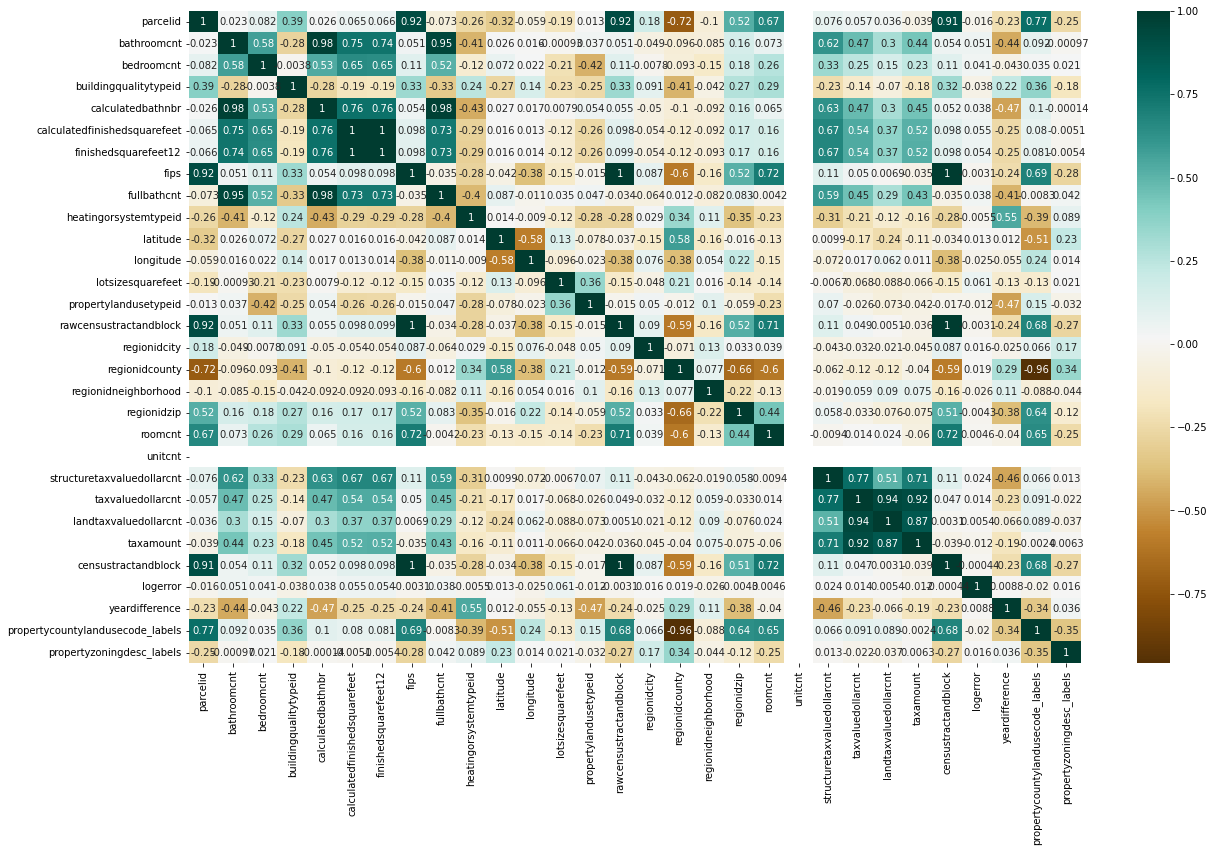

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(correlation, cmap='BrBG', annot=True)

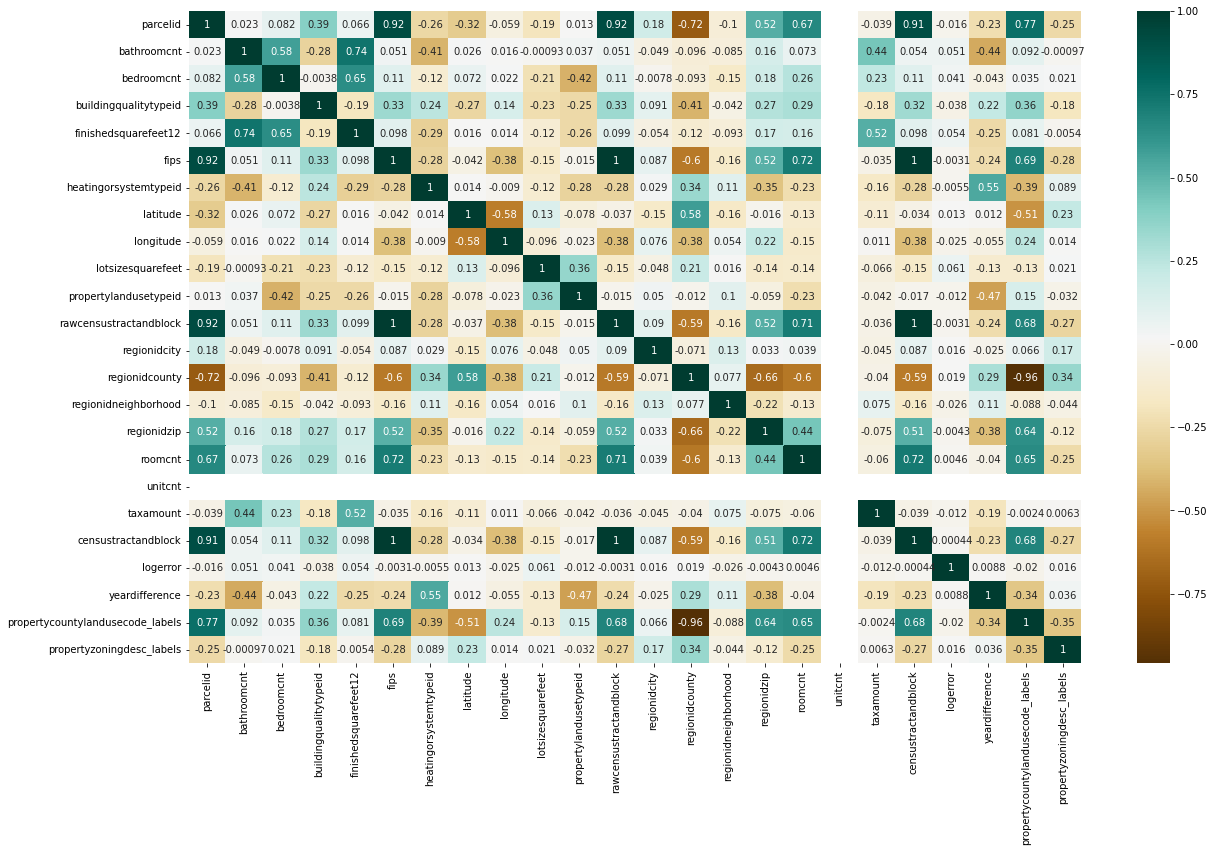

In [ ]:
no_out_df.drop(columns=['calculatedbathnbr', 'calculatedfinishedsquarefeet', 'structuretaxvaluedollarcnt', 
                        'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'fullbathcnt'], axis=1, inplace=True)

plt.figure(figsize=(20,12))
sns.heatmap(no_out_df.corr(), cmap='BrBG',annot=True)

In [ ]:
no_out_df.shape

(2359, 24)

In [ ]:
no_out_df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,finishedsquarefeet12,fips,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,unitcnt,taxamount,censustractandblock,logerror,yeardifference,propertycountylandusecode_labels,propertyzoningdesc_labels
0,17073783,2.5,3.0,7.0,1264.0,6111.0,2.0,34.303597,-119.287236,1735.0,265.0,61.110022,34543.0,2061.0,48570.0,97081.0,5.0,1.0,2015.06,61.110022,0.0953,29.0,27,150
1,17088994,1.0,2.0,7.0,777.0,6111.0,2.0,34.272866,-119.198911,6000.0,266.0,61.110015,34543.0,2061.0,48570.0,97083.0,4.0,1.0,2581.30,61.110015,0.0198,25.0,28,150
2,17100444,2.0,3.0,7.0,1101.0,6111.0,2.0,34.340801,-119.079610,6569.0,261.0,61.110007,26965.0,2061.0,48570.0,97113.0,5.0,1.0,591.64,61.110007,0.0060,59.0,23,150
3,17102429,1.5,2.0,7.0,1554.0,6111.0,2.0,34.354313,-119.076405,7400.0,261.0,61.110008,26965.0,2061.0,48570.0,97113.0,5.0,1.0,682.78,61.110008,-0.0566,50.0,22,150
4,17109604,2.5,4.0,7.0,2415.0,6111.0,2.0,34.266578,-119.165392,6326.0,261.0,61.110014,34543.0,2061.0,48570.0,97084.0,8.0,1.0,5886.92,61.110014,0.0573,31.0,23,150


In [ ]:
no_out_df.drop(columns=['censustractandblock', 'propertycountylandusecode_labels'], axis=1, inplace=True)
no_out_df.shape

(2359, 22)

In [ ]:
# Saving final Dataset

no_out_df.to_csv('final_zillow_dataset.csv', index=False)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import xgboost

from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

%matplotlib inline
pd.set_option('display.max_columns',None)
warnings.simplefilter(action='ignore')

In [ ]:
df = pd.read_csv('./final_zillow_dataset.csv')
df.shape

(2359, 22)

In [ ]:
df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,finishedsquarefeet12,fips,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,unitcnt,taxamount,logerror,yeardifference,propertyzoningdesc_labels
0,17073783,2.5,3.0,7.0,1264.0,6111.0,2.0,34.303597,-119.287236,1735.0,265.0,61.110022,34543.0,2061.0,48570.0,97081.0,5.0,1.0,2015.06,0.0953,29.0,150
1,17088994,1.0,2.0,7.0,777.0,6111.0,2.0,34.272866,-119.198911,6000.0,266.0,61.110015,34543.0,2061.0,48570.0,97083.0,4.0,1.0,2581.30,0.0198,25.0,150
2,17100444,2.0,3.0,7.0,1101.0,6111.0,2.0,34.340801,-119.079610,6569.0,261.0,61.110007,26965.0,2061.0,48570.0,97113.0,5.0,1.0,591.64,0.0060,59.0,150
3,17102429,1.5,2.0,7.0,1554.0,6111.0,2.0,34.354313,-119.076405,7400.0,261.0,61.110008,26965.0,2061.0,48570.0,97113.0,5.0,1.0,682.78,-0.0566,50.0,150
4,17109604,2.5,4.0,7.0,2415.0,6111.0,2.0,34.266578,-119.165392,6326.0,261.0,61.110014,34543.0,2061.0,48570.0,97084.0,8.0,1.0,5886.92,0.0573,31.0,150


In [ ]:
X = df.drop('logerror', axis=1)
y = df['logerror']

new_df = df.copy()

print(X.shape, y.shape)

(2359, 21) (2359,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 23)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1769, 21), (1769,), (590, 21), (590,))

In [ ]:
train_vars = [var for var in X_train.columns if var not in ['parcelid', 'logerror']]
len(train_vars)

20

In [ ]:
scaler = StandardScaler()

scaler.fit(X_train[train_vars]) 

X_train[train_vars] = scaler.transform(X_train[train_vars])

X_test[train_vars] = scaler.transform(X_test[train_vars])

In [ ]:
X_train.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,finishedsquarefeet12,fips,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,unitcnt,taxamount,yeardifference,propertyzoningdesc_labels
1942,14649074,1.005848,1.058897,0.558225,0.337590,0.433638,-0.517238,-1.469643,1.425909,-0.319417,1.463495,0.424440,-0.784455,-1.520981,-0.460942,1.077925,-0.521498,0.0,0.356143,-1.804409,-0.481767
238,14006868,-0.838670,0.026837,0.558225,-0.396302,0.433638,-0.517238,-0.809440,0.600843,-0.276028,-0.624683,0.427057,-0.170906,-1.520981,-0.460942,1.207233,1.617287,0.0,-0.745873,0.577871,-0.481767
259,14201567,-0.223831,0.026837,0.558225,0.058219,0.433638,-0.517238,-0.509451,1.306932,-0.207115,-0.624683,0.423963,-0.344912,-1.520981,-0.460942,1.282866,-0.521498,0.0,-0.335797,-0.740891,-0.481767
2254,14676250,-0.838670,0.026837,0.558225,-0.923198,0.433638,-0.517238,-1.924909,1.471106,-0.319417,1.463495,0.424921,0.287410,-1.520981,-0.460942,1.053527,-0.521498,0.0,-0.801437,-0.272943,-0.481767
1691,12001351,-0.223831,1.058897,0.558225,-0.153119,-0.587561,1.950383,0.292859,-0.442250,-0.305379,-0.624683,-0.596553,-0.801041,0.730782,1.915727,-1.283773,-0.521498,0.0,1.633487,1.981714,-0.481767


In [ ]:
X_train_new = X_train.copy()
X_test_new = X_test.copy()

X_train.drop(columns='parcelid', axis=1, inplace=True)
X_test.drop(columns='parcelid', axis=1, inplace=True)

In [ ]:
linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
linear_reg_pred = linear_reg.predict(X_test)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, linear_reg_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, linear_reg_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, linear_reg_pred))))

Mean Absolute Error : 0.05094753937536556

Mean Squared Error : 0.0070864042599635205

Root Mean Squared Error : 0.0841807831988009


In [ ]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) # L1 reguralization

elastic_net.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [ ]:
elastic_net_pred = elastic_net.predict(X_test)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, elastic_net_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, elastic_net_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, elastic_net_pred))))

Mean Absolute Error : 0.05102606490308611

Mean Squared Error : 0.007149857896289001

Root Mean Squared Error : 0.08455683234540542


In [ ]:
ridge_reg = Ridge(alpha=1, solver='cholesky')

ridge_reg.fit(X_train, y_train)

Ridge(alpha=1, solver='cholesky')

In [ ]:
ridge_reg_pred = ridge_reg.predict(X_test)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, ridge_reg_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, ridge_reg_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, ridge_reg_pred))))

Mean Absolute Error : 0.05096093175554489

Mean Squared Error : 0.0070935465289904435

Root Mean Squared Error : 0.0842231947208751


In [ ]:
lasso_reg = Lasso(alpha=0.1)

lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
lasso_reg_pred = lasso_reg.predict(X_test)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, lasso_reg_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, lasso_reg_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, lasso_reg_pred))))

Mean Absolute Error : 0.05102606490308611

Mean Squared Error : 0.007149857896289001

Root Mean Squared Error : 0.08455683234540542


In [ ]:
xgb_reg = xgboost.XGBRegressor()

xgb_reg.fit(X_train, y_train)

[14:35:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
xgb_reg_pred = xgb_reg.predict(X_test)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, xgb_reg_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, xgb_reg_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, xgb_reg_pred))))

Mean Absolute Error : 0.0519540909047046

Mean Squared Error : 0.006877934748438907

Root Mean Squared Error : 0.08293331506963234


In [ ]:
adaboost_reg = AdaBoostRegressor()

adaboost_reg.fit(X_train, y_train)

AdaBoostRegressor()

In [ ]:
adaboost_reg_pred = adaboost_reg.predict(X_test)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, adaboost_reg_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, adaboost_reg_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, adaboost_reg_pred))))

Mean Absolute Error : 0.06577401858074006

Mean Squared Error : 0.009213388981505958

Root Mean Squared Error : 0.09598639998200764


In [ ]:
gb_reg = GradientBoostingRegressor()

gb_reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
gb_reg_pred = gb_reg.predict(X_test)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, gb_reg_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, gb_reg_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, gb_reg_pred))))

Mean Absolute Error : 0.05324115715669233

Mean Squared Error : 0.007118548954464501

Root Mean Squared Error : 0.08437149373138123


In [ ]:
tree_reg = DecisionTreeRegressor(max_depth=5)

tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
tree_reg_pred = tree_reg.predict(X_test)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, tree_reg_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, tree_reg_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, tree_reg_pred))))

Mean Absolute Error : 0.05045458771211868

Mean Squared Error : 0.006862525456515036

Root Mean Squared Error : 0.08284036127706733


In [ ]:
forest_reg = RandomForestRegressor(n_estimators= 500, max_depth=6)

forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=500)

In [ ]:
forest_reg_pred = forest_reg.predict(X_test)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, forest_reg_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, forest_reg_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, forest_reg_pred))))

Mean Absolute Error : 0.05037716880034351

Mean Squared Error : 0.0068678204677059115

Root Mean Squared Error : 0.08287231424128272


In [ ]:
scores = cross_val_score(forest_reg, X_train, y_train, scoring="neg_mean_squared_error", cv = 5)

In [ ]:
forest_reg_rmse_scores = np.sqrt(-scores)
forest_reg_rmse_scores

array([0.09754964, 0.08076655, 0.07988511, 0.07998226, 0.07333337])

In [ ]:
param_grid = [
    {'n_estimators': [300, 400, 500], 'max_features': [2, 4, 6]},
    {'bootstrap': [False], 'n_estimators': [300, 400, 500], 'max_features': [2, 4, 6]}]

forest_regressor = RandomForestRegressor()

grid_search = GridSearchCV(forest_regressor, param_grid, scoring='neg_mean_squared_error',return_train_score=True,cv=3)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6],
                          'n_estimators': [300, 400, 500]},
                         {'bootstrap': [False], 'max_features': [2, 4, 6],
                          'n_estimators': [300, 400, 500]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 500}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=500)

In [ ]:
final_predictor = grid_search.best_estimator_
final_predictor.fit(X_train, y_train)
final_pred = final_predictor.predict(X_test)

In [ ]:
print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, final_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, final_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, final_pred))))

Mean Absolute Error : 0.053058700950429985

Mean Squared Error : 0.007090829069053171

Root Mean Squared Error : 0.08420706068408498


In [ ]:
# saving the model
import pickle
file_name = 'final_pickle_model.pickle'
pickle.dump(final_predictor,open(file_name,'wb'))

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_

attrs = list(df.select_dtypes(include = ['float64','int64']))

sorted(zip(attrs, feature_importances), reverse=True)

[('unitcnt', 0.0944225563760655),
 ('taxamount', 0.08095452818493808),
 ('roomcnt', 0.0),
 ('regionidzip', 0.011566051163124147),
 ('regionidneighborhood', 0.07810540127814103),
 ('regionidcounty', 0.045636351482827714),
 ('regionidcity', 0.004467761988217041),
 ('rawcensustractandblock', 0.054568323099484686),
 ('propertylandusetypeid', 0.08705819801866142),
 ('parcelid', 0.040534868923116876),
 ('lotsizesquarefeet', 0.012148659606801362),
 ('longitude', 0.08728579560422162),
 ('logerror', 0.05956405632998335),
 ('latitude', 0.09154845246411089),
 ('heatingorsystemtypeid', 0.09198048195166365),
 ('fips', 0.011166091242080555),
 ('finishedsquarefeet12', 0.005026736214543934),
 ('buildingqualitytypeid', 0.08945786408112447),
 ('bedroomcnt', 0.014226500739016304),
 ('bathroomcnt', 0.040281321251877555)]

In [ ]:
model_pred = pd.DataFrame({'parcelid':X_test_new.parcelid, 'logerror':final_pred})
model_pred.to_csv('model_predictions.csv',index=False)
model_pred.head()

,parcelid,logerror
2008,11063134,0.006564
802,10873619,-0.002480
19,17275763,-0.015281
608,13040966,0.001694
712,14711393,-0.005943
